<a href="https://colab.research.google.com/github/TharunNP/Data-science/blob/main/Copy_of_Group_Project_Cirrhosis_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

from sklearn.metrics import roc_auc_score, roc_auc_score
from itertools import product
from sklearn.impute import KNNImputer
from collections import defaultdict

from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 
df = pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")

Mounted at /content/drive/


In [ ]:
df['Drug'] = df['Drug'].fillna('NotParticipated')
df["Age"] = (df["Age"]/365)
df["Age"] = df["Age"].astype("int64")

# Exploratory Data Analysis

In [ ]:
def d_p():
  return plt.figure(figsize=(8,8))

In [ ]:
def d_p2():
  return plt.figure(figsize=(16,10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


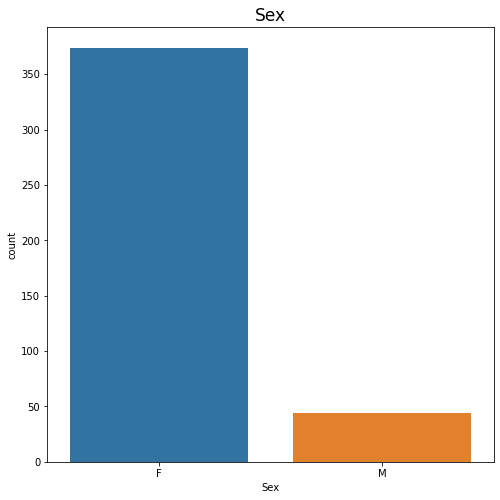

In [ ]:
d_p()
seaborn.countplot(df["Sex"])
plt.title("Sex", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


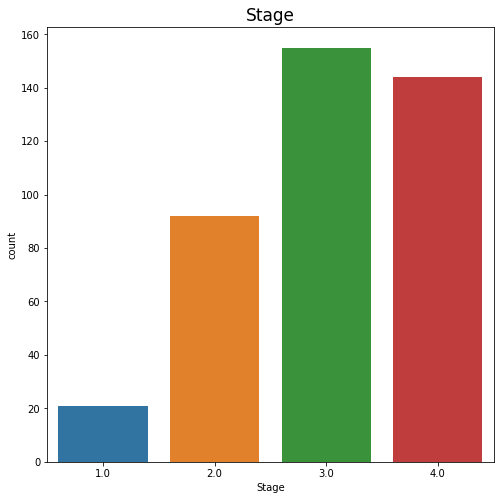

In [ ]:
d_p()
seaborn.countplot(df["Stage"])
plt.title("Stage", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


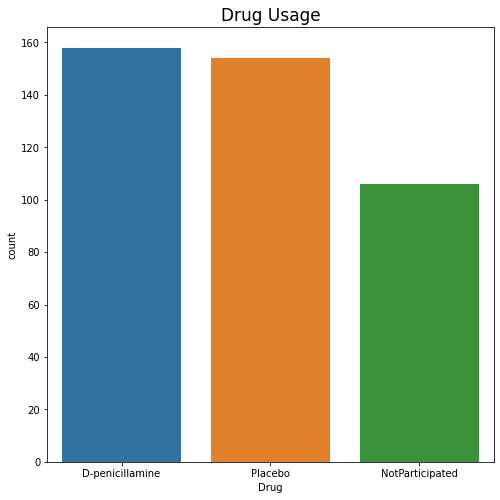

In [ ]:
d_p()
seaborn.countplot(df["Drug"])
plt.title("Drug Usage", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


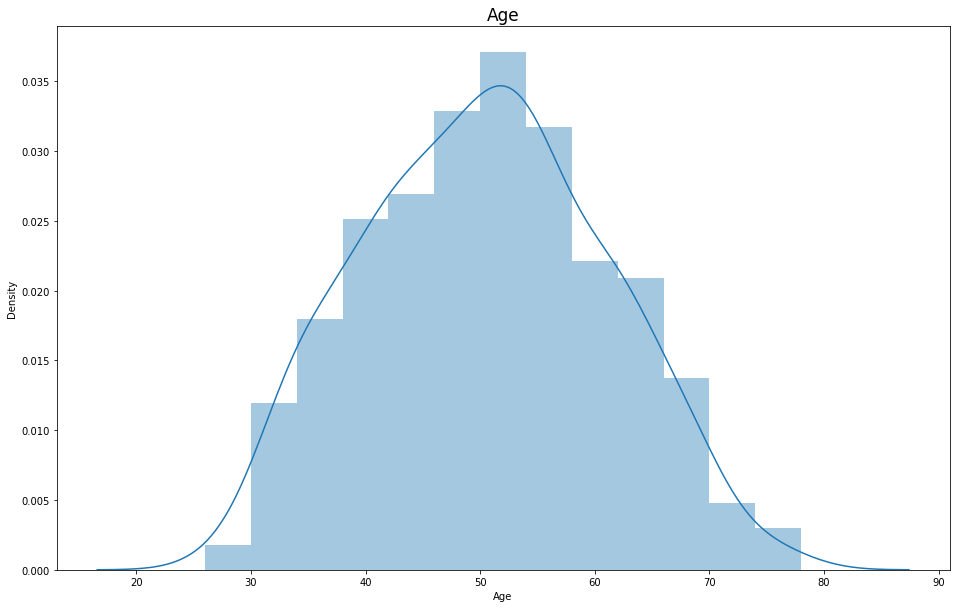

In [ ]:
d_p2()
seaborn.distplot(df["Age"])
plt.title("Age", size=17)
plt.show()

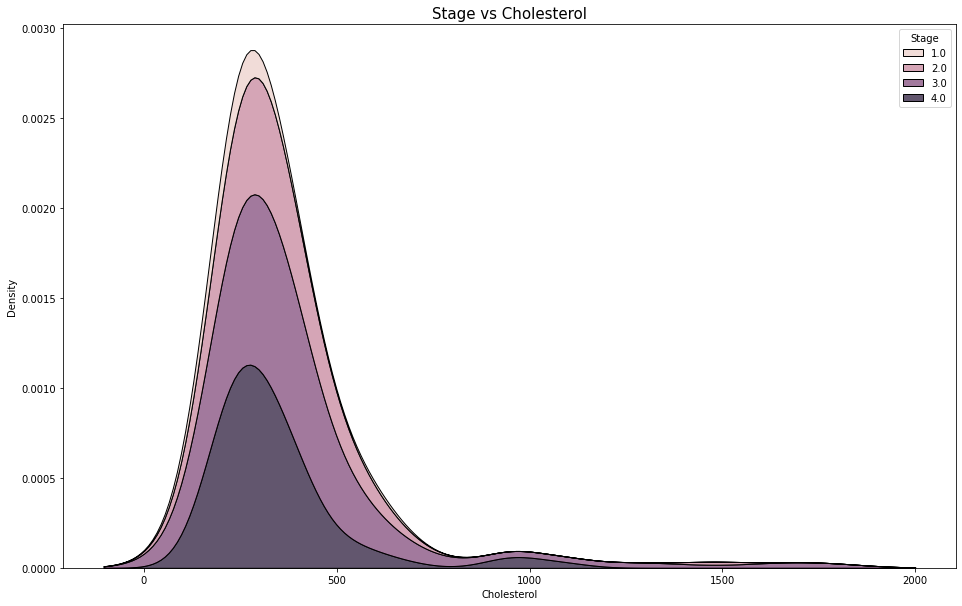

In [ ]:
d_p2()
seaborn.kdeplot(x=df["Cholesterol"], hue=df['Stage'], multiple="stack")
plt.title("Stage vs Cholesterol", size=15)
plt.show()

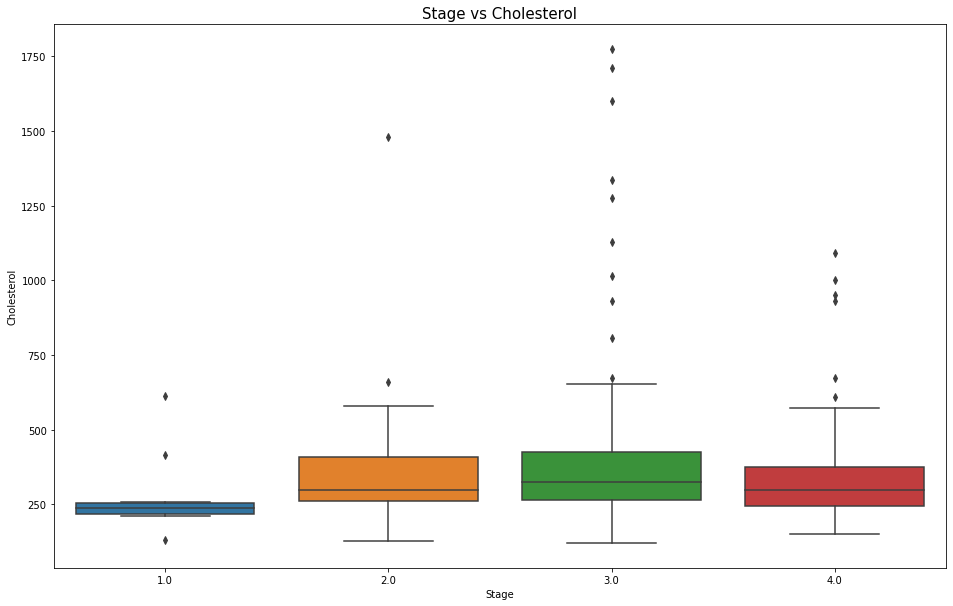

In [ ]:
d_p2()
seaborn.boxplot(x=df["Stage"], y=df["Cholesterol"])
plt.title("Stage vs Cholesterol", size=15)
plt.show()

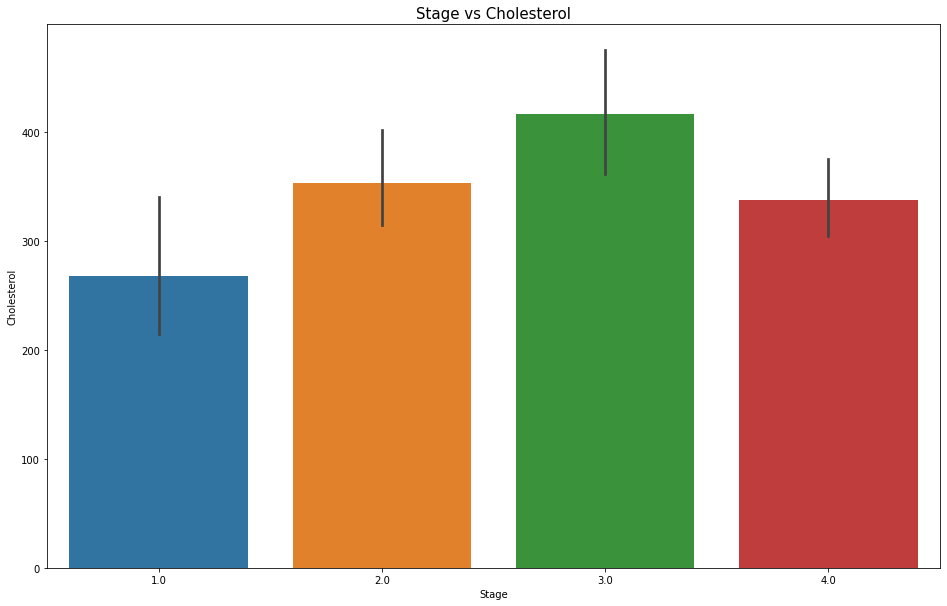

In [ ]:
d_p2()
seaborn.barplot(x=df["Stage"], y=df["Cholesterol"])
plt.title("Stage vs Cholesterol", size=15)
plt.show()

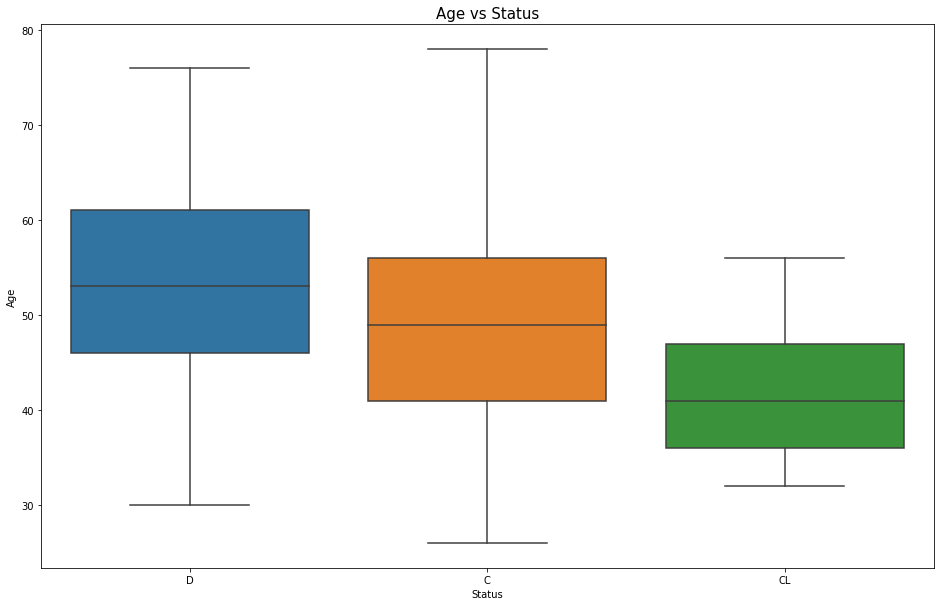

In [ ]:
d_p2()
seaborn.boxplot(x=df["Status"], y=df["Age"])
plt.title("Age vs Status", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


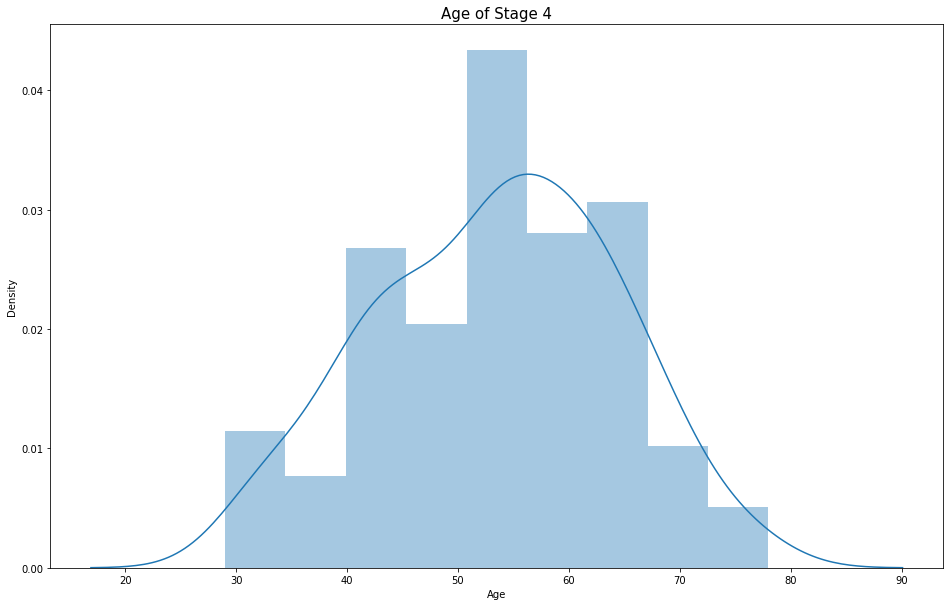

In [ ]:
stage_4_cirrhosis = df[df["Stage"]==4]

d_p2()
seaborn.distplot(stage_4_cirrhosis["Age"])
plt.title("Age of Stage 4", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


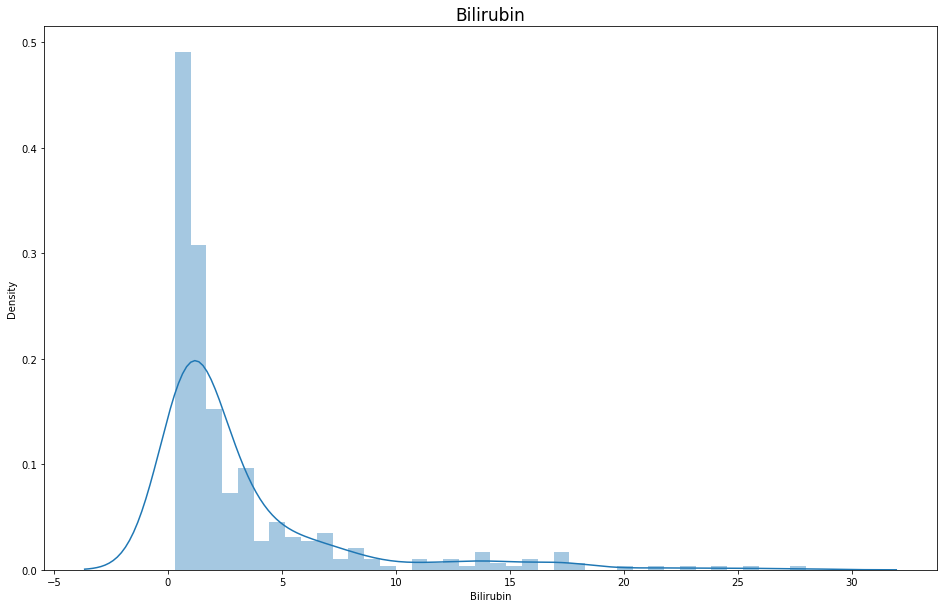

In [ ]:
d_p2()
seaborn.distplot(df["Bilirubin"])
plt.title("Bilirubin", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


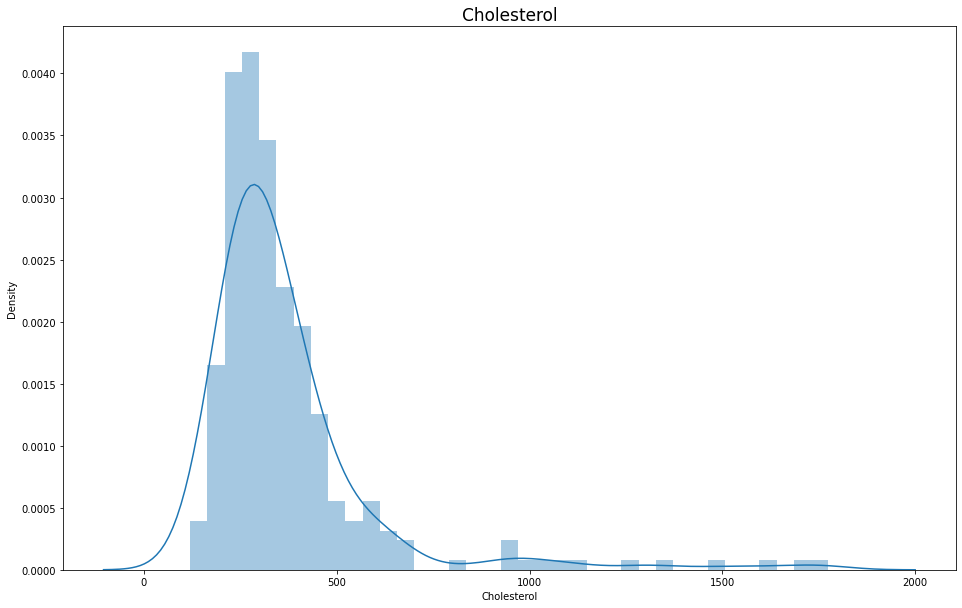

In [ ]:
d_p2()
seaborn.distplot(df["Cholesterol"])
plt.title("Cholesterol", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


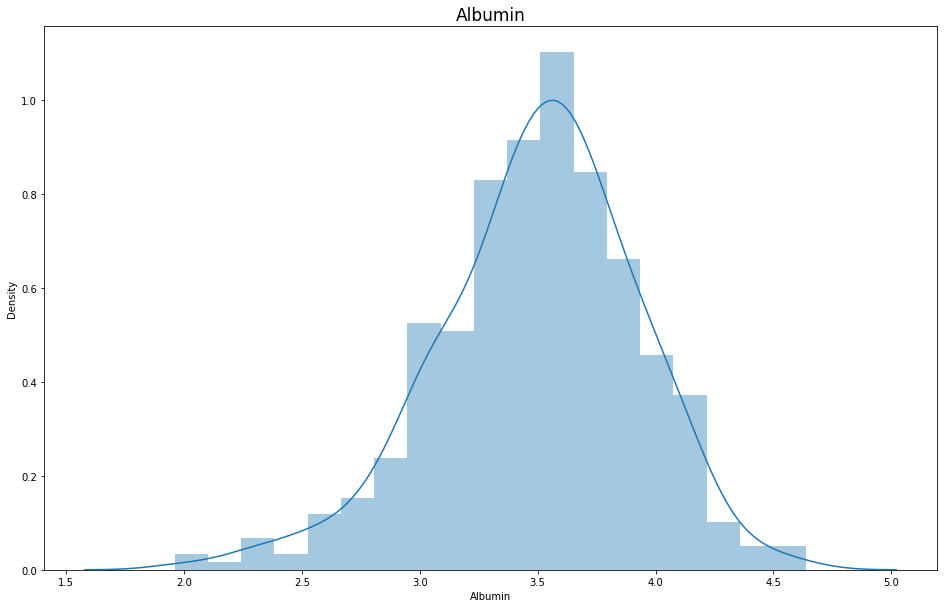

In [ ]:
d_p2()
seaborn.distplot(df["Albumin"])
plt.title("Albumin", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


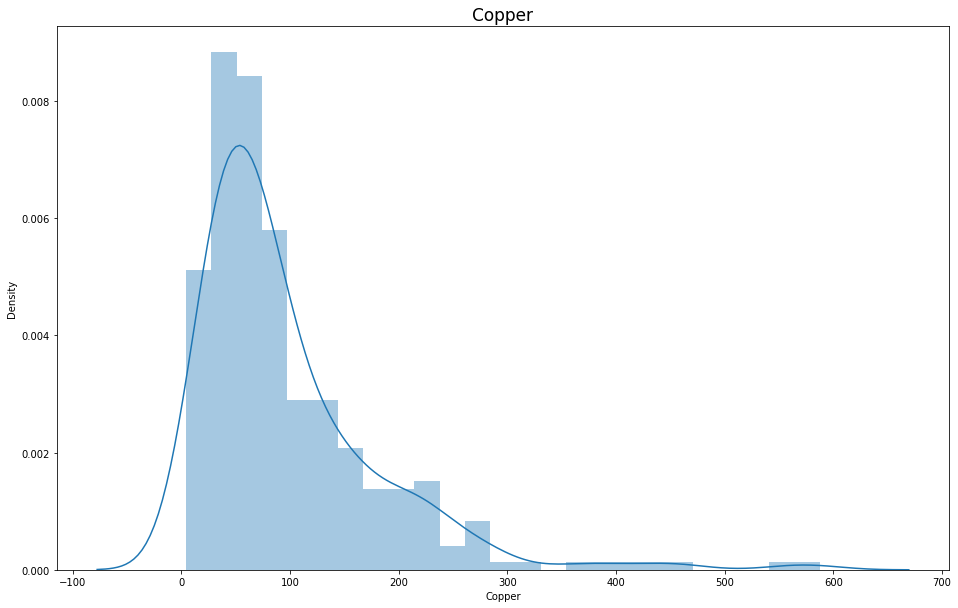

In [ ]:
d_p2()
seaborn.distplot(df["Copper"])
plt.title("Copper", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


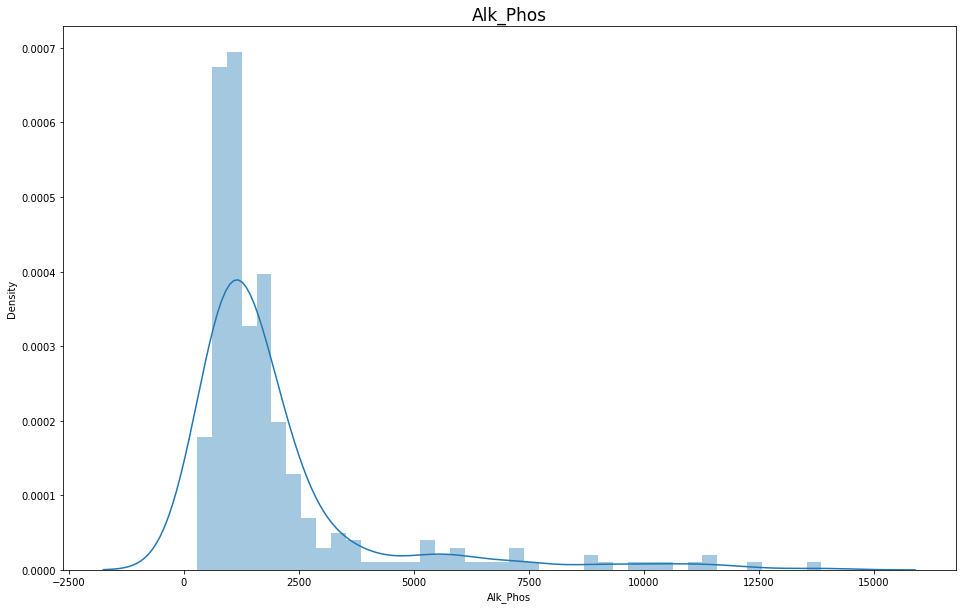

In [ ]:
d_p2()
seaborn.distplot(df["Alk_Phos"])
plt.title("Alk_Phos", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


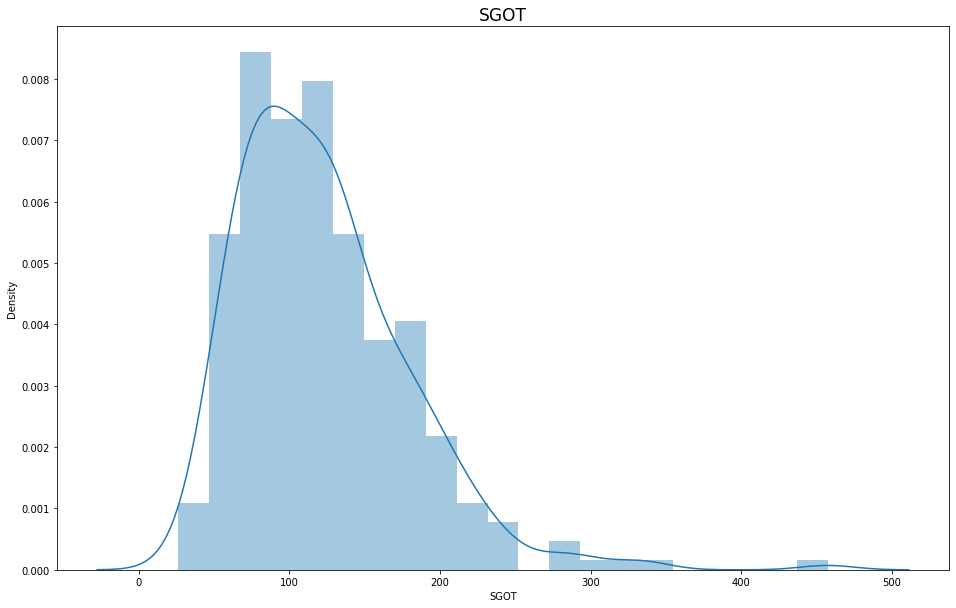

In [ ]:
d_p2()
seaborn.distplot(df["SGOT"])
plt.title("SGOT", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


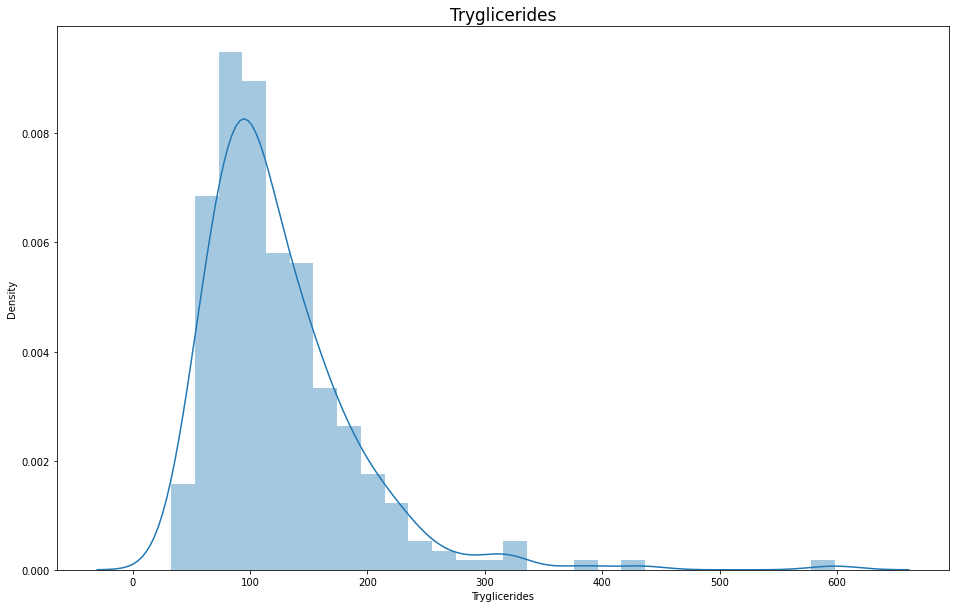

In [ ]:
d_p2()
seaborn.distplot(df["Tryglicerides"])
plt.title("Tryglicerides", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


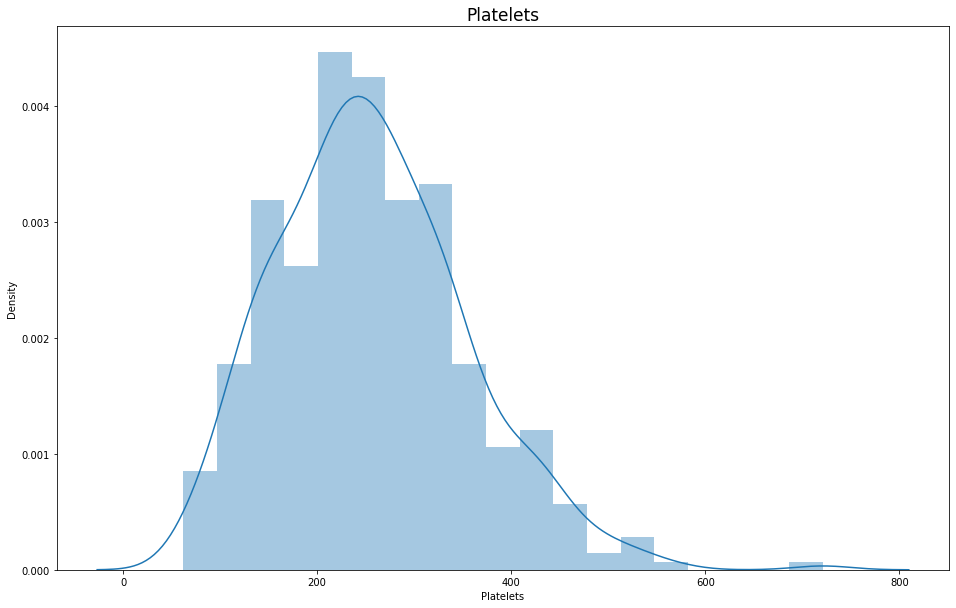

In [ ]:
d_p2()
seaborn.distplot(df["Platelets"])
plt.title("Platelets", size=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


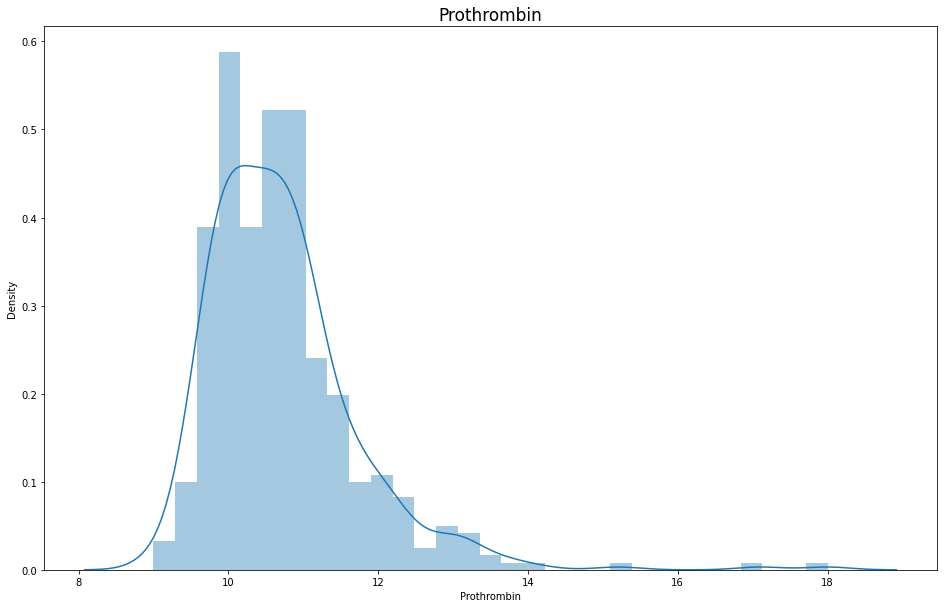

In [ ]:
d_p2()
seaborn.distplot(df["Prothrombin"])
plt.title("Prothrombin", size=17)
plt.show()

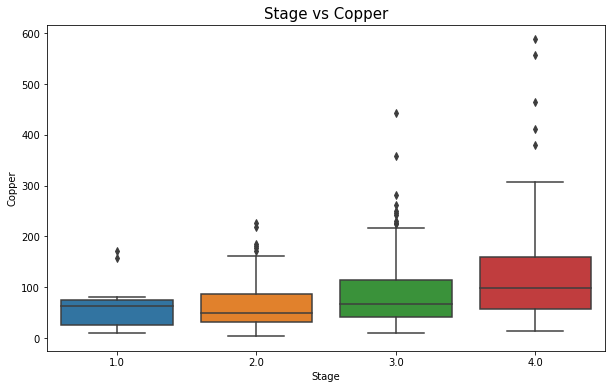

In [ ]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x=df["Stage"], y=df["Copper"])
plt.title("Stage vs Copper", size=15)
plt.show()

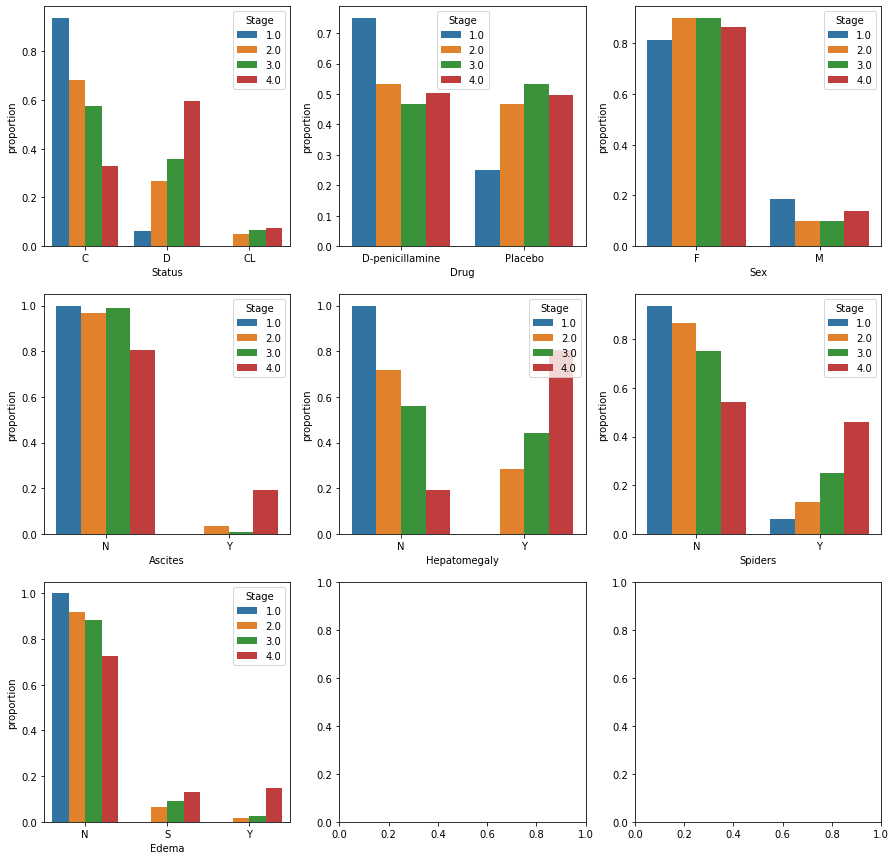

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
axes = axes.flatten()
short_df = df.iloc[: 305]
for i, column in enumerate(df.loc[:, :'Stage'].select_dtypes('O')):
    data = short_df[column].groupby(df['Stage']).value_counts(normalize = True).rename('proportion').to_frame().reset_index()
    seaborn.barplot(x = column, y = 'proportion', hue = 'Stage', data = data, ax = axes[i])

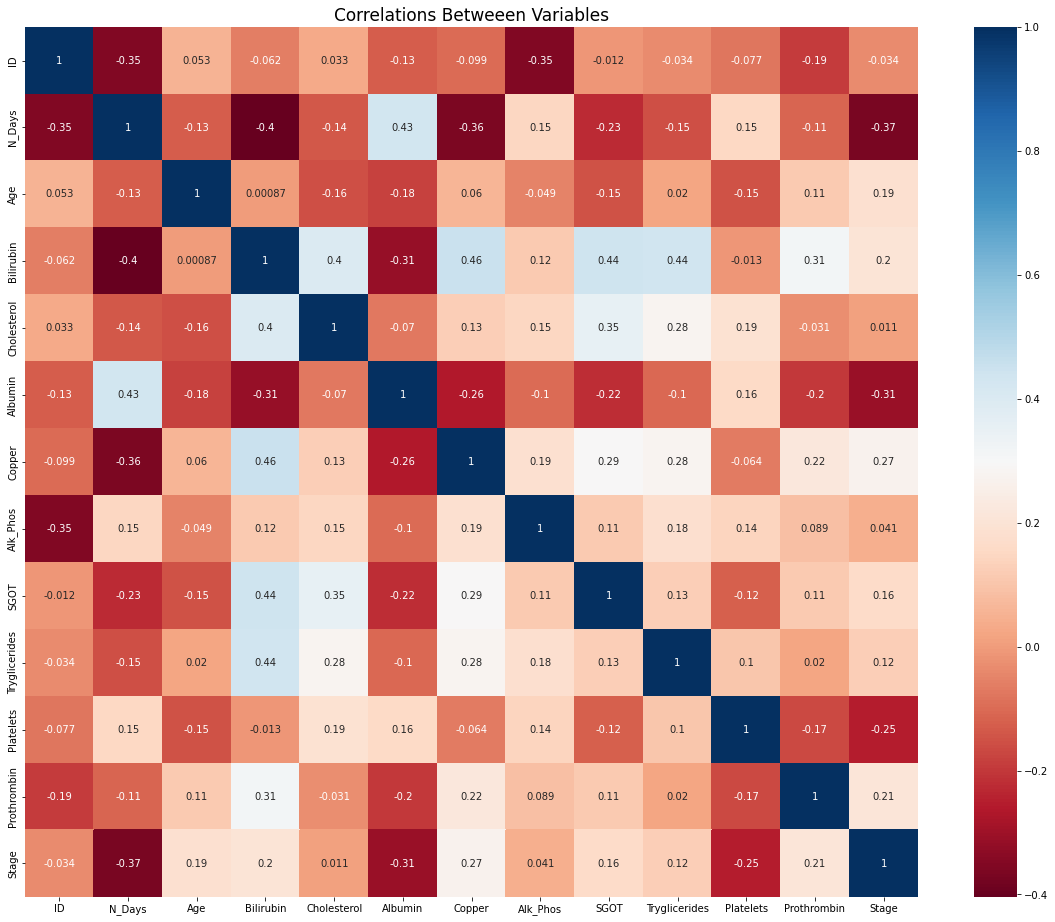

In [ ]:
plt.figure(figsize=(20,16))
seaborn.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=17)
plt.show()

# Solving missing values problem


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")
df['Drug'] = df['Drug'].fillna('NotParticipated')

In [ ]:
categorical_cols = df.select_dtypes(["object"])
numerical_cols = df.select_dtypes(["float64","int64"])

for col in categorical_cols.columns:
    df[col].fillna(df[col].mode().values[0], inplace=True)

for col in numerical_cols.columns:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
"""
        Encode cata columns in df skipping nan. 'fit_transform' in LabelEncoder()
"""
def encode_with_nan(data):

    categorical_cols = data.dtypes
    categorical_cols = list(categorical_cols[categorical_cols == 'object'].index)
    
    decoder = dict.fromkeys(categorical_cols, dict())
    
    for col in categorical_cols:
        vals = list(data[col].unique())
        if np.nan in vals:
            vals.remove(np.nan)
        
        d = dict.fromkeys(vals, None)
        for val in enumerate(vals):
            d[val[1]] = val[0]
            
        decoder[col] = d
        data[col] = data[col].apply(lambda x: d[x] if x in d.keys() else x)
    return data, decoder


def decode_categorical(data, decoder):
    """
        Decode cat columns in df skipping nan. 'inverse_transform' in LabelEncoder()
    """
    categorical_cols = list(decoder.keys())
    
    for col in categorical_cols:
        vals = list(data[col].unique())
        if np.nan in vals:
            vals.remove(np.nan)
        
        keys = list(decoder[col].keys())
        data[col] = data[col].apply(lambda x: keys[list(decoder[col].values()).index(x)] if x in decoder[col].values() else x)
    return data

df, decoder = encode_with_nan(df)
decoder

{'Ascites': {'N': 1, 'Y': 0},
 'Drug': {'D-penicillamine': 0, 'NotParticipated': 2, 'Placebo': 1},
 'Edema': {'N': 1, 'S': 2, 'Y': 0},
 'Hepatomegaly': {'N': 1, 'Y': 0},
 'Sex': {'F': 0, 'M': 1},
 'Spiders': {'N': 1, 'Y': 0},
 'Status': {'C': 1, 'CL': 2, 'D': 0}}

# KNN-Imputer

In [ ]:
def knn_imputer2df(data, n_neighbors=4, weights='distance'):
    """
        Replaces nan values with prediction by KNN. Can be customed (n_neighbours, weights)
    """
    df_column_names = list(data.columns)
    
    imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights)
    data = imputer.fit_transform(data)
    return pd.DataFrame(data=data, columns=df_column_names)

df = knn_imputer2df(df)

In [ ]:
def round_encoded_cat_features(data, decoder):
    columns = list(decoder.keys())
    data.loc[:, columns] = data.loc[:, columns].apply(round)
    data['Stage'] = data['Stage'].apply(round)
    return data

In [ ]:
temp_df = df.copy()
temp_df = round_encoded_cat_features(temp_df, decoder)
temp_df = decode_categorical(temp_df, decoder)

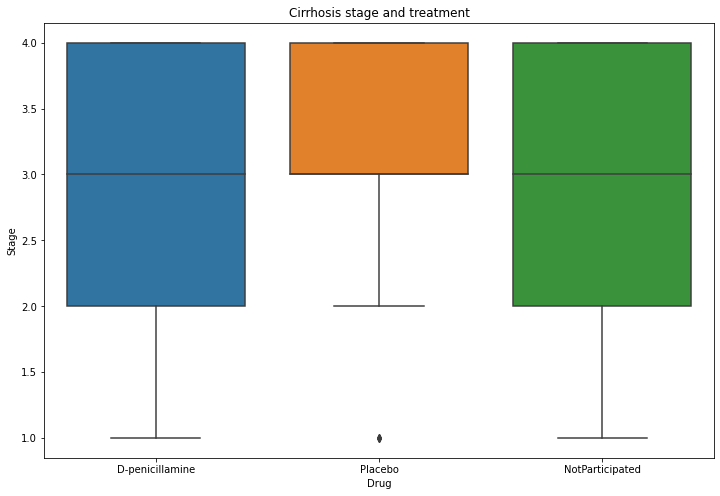

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cirrhosis stage and treatment')
seaborn.boxplot(x=temp_df['Drug'], y=temp_df['Stage']);

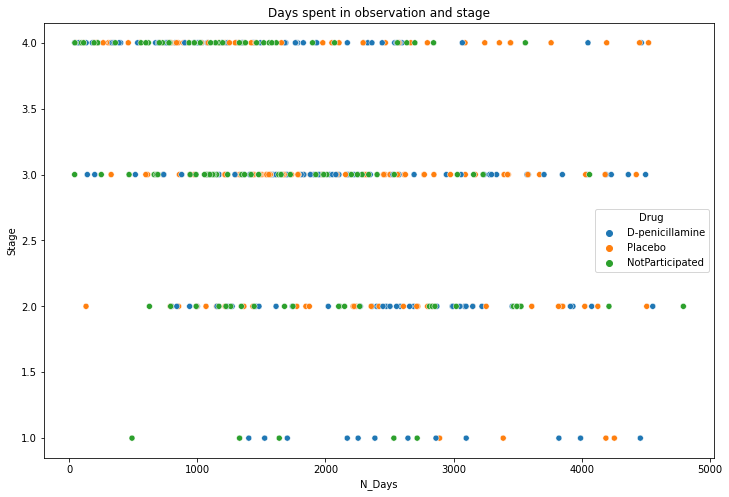

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Days spent in observation and stage')
seaborn.scatterplot(x=temp_df['N_Days'], y=temp_df['Stage'], hue=temp_df['Drug']);

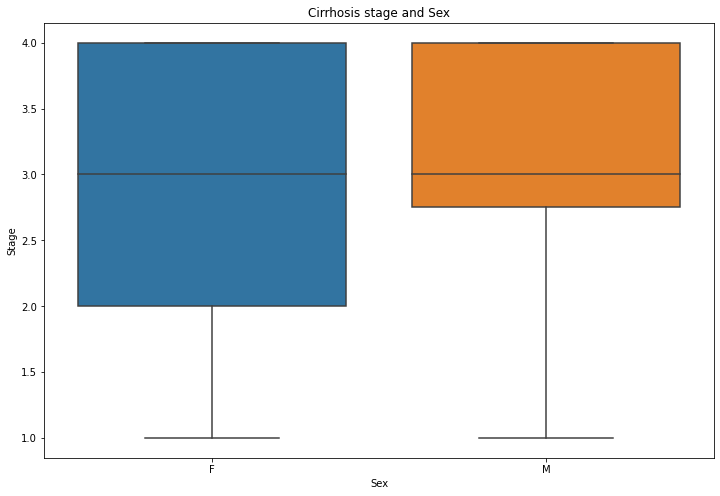

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cirrhosis stage and Sex')
seaborn.boxplot(x=temp_df['Sex'], y=temp_df['Stage']);

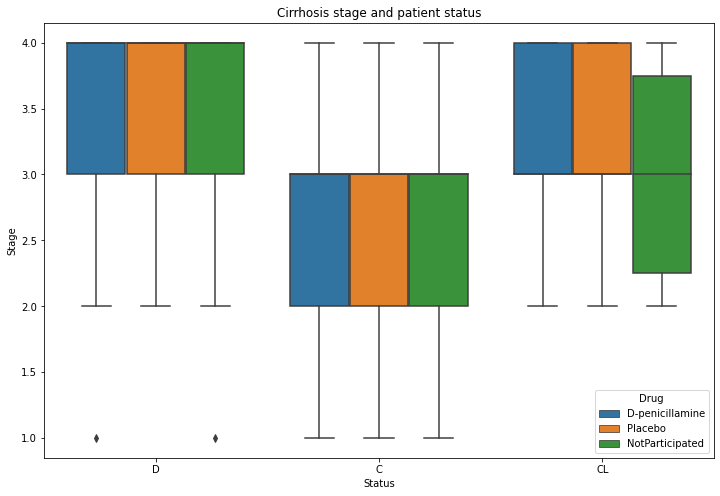

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cirrhosis stage and patient status')
seaborn.boxplot(x=temp_df['Status'], y=temp_df['Stage'], hue=temp_df['Drug']);

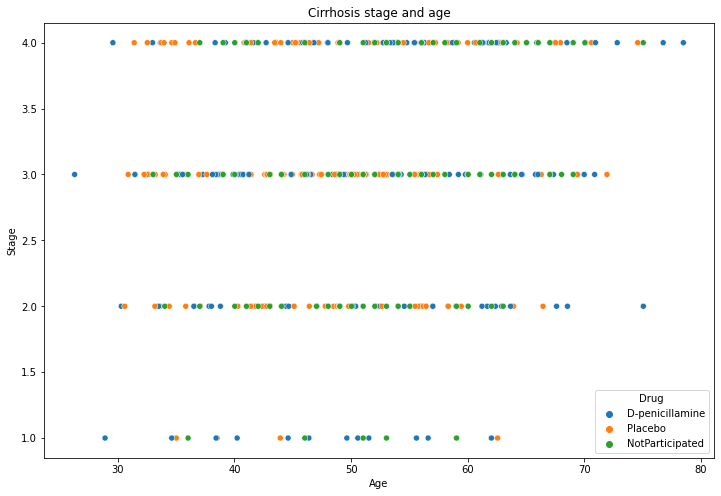

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cirrhosis stage and age')
seaborn.scatterplot(x=temp_df['Age'] / 365, y=temp_df['Stage'], hue=temp_df['Drug']);

Finding the mean age by diving the day by year

In [ ]:
temp_df['Age'].mean() / 365

50.776305957920954

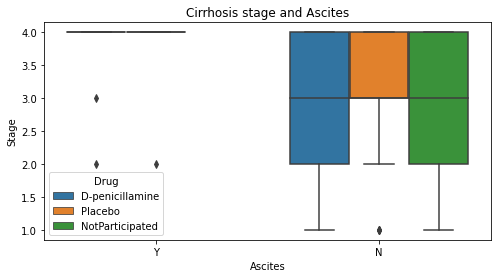

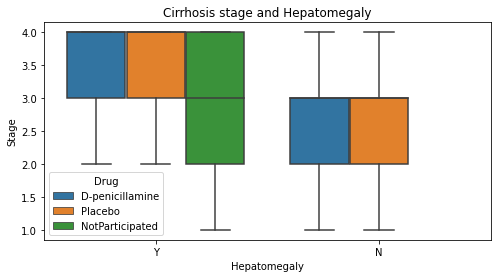

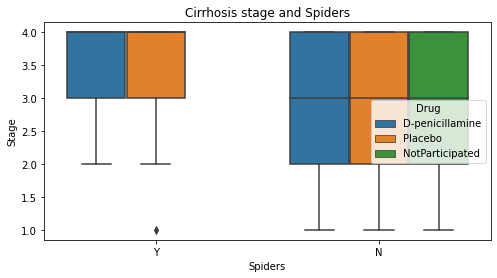

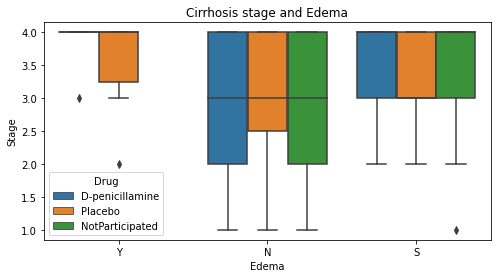

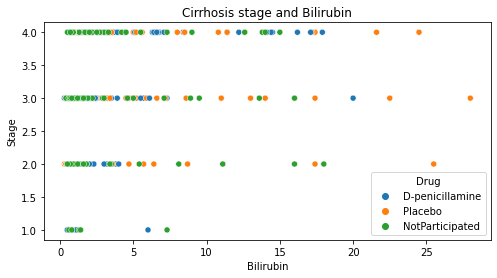

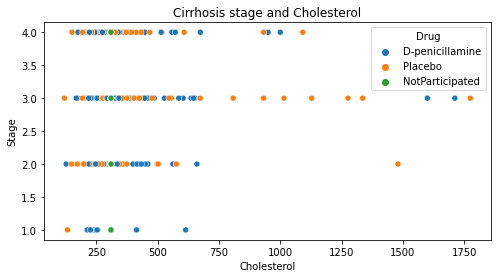

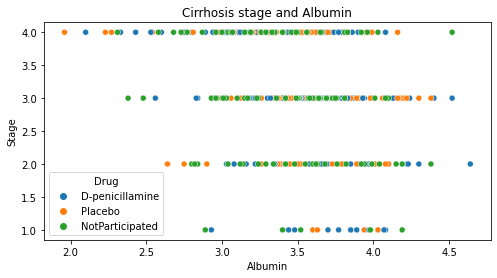

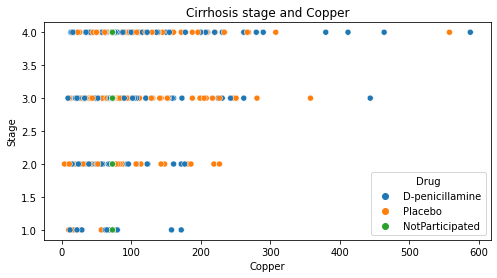

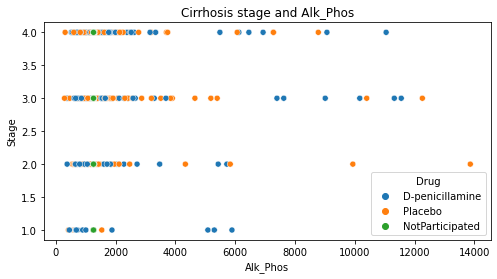

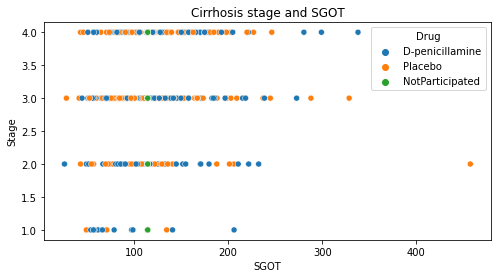

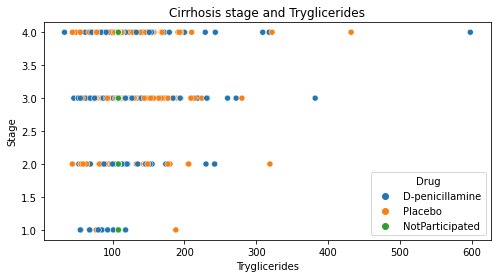

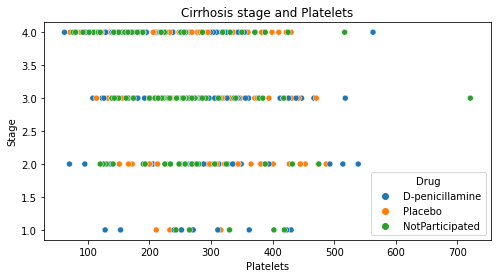

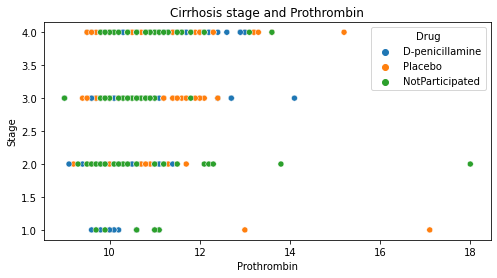

In [ ]:
diseases = list(temp_df.iloc[:,6:-1].columns)

for d in diseases:
    if temp_df[d].dtype == 'object':
        plt.figure(figsize=(8,4))
        name = 'Cirrhosis stage and ' + str(d)
        plt.title(name)
        seaborn.boxplot(x=temp_df[d], y=temp_df['Stage'], hue=temp_df['Drug']);
    else:
        plt.figure(figsize=(8,4))
        name = 'Cirrhosis stage and ' + str(d)
        plt.title(name)
        seaborn.scatterplot(x=temp_df[d], y=temp_df['Stage'], hue=temp_df['Drug']);

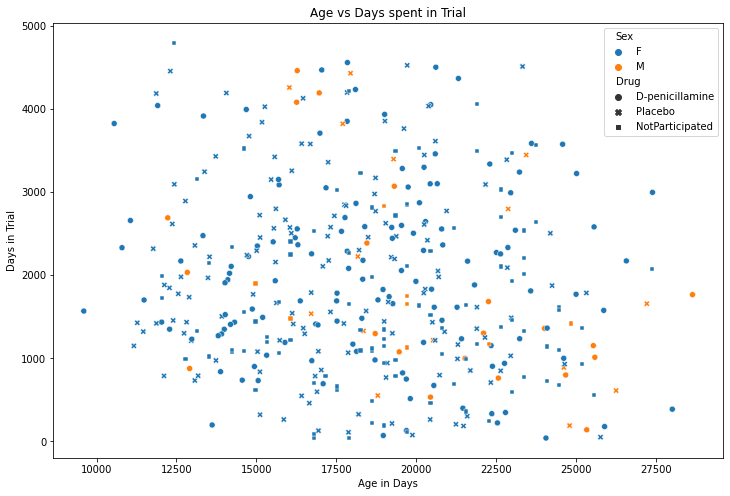

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Age vs Days spent in Trial')
age_and_days = seaborn.scatterplot(x=df['Age'], y=temp_df['N_Days'], style=temp_df['Drug'], hue=temp_df['Sex'])
age_and_days.set(xlabel='Age in Days', ylabel='Days in Trial')
plt.show()

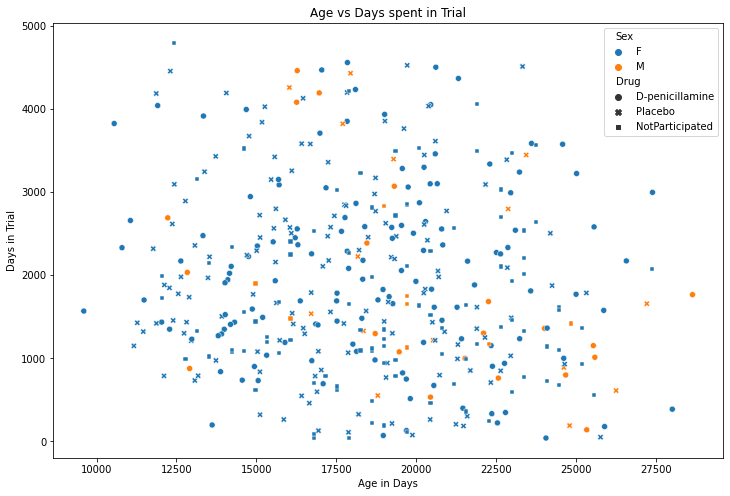

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Age vs Days spent in Trial')
age_and_days = seaborn.scatterplot(x=temp_df['Age'], y=temp_df['N_Days'], style=temp_df['Drug'], hue=temp_df['Sex'])
age_and_days.set(xlabel='Age in Days', ylabel='Days in Trial')
plt.show()

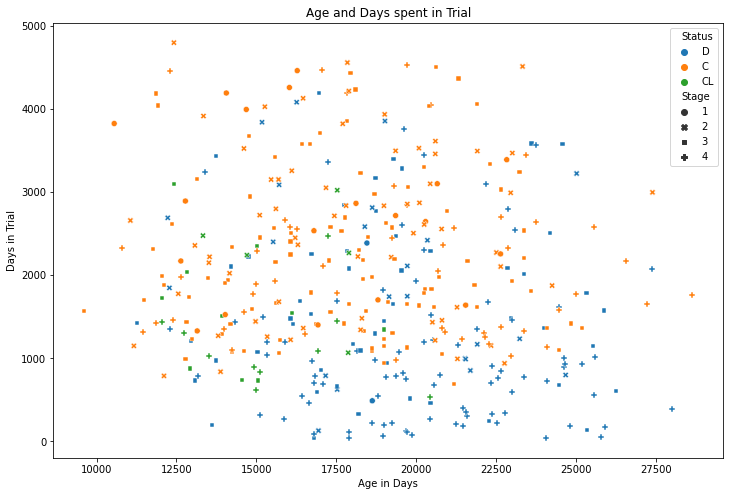

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Age and Days spent in Trial')
age_and_days = seaborn.scatterplot(x=temp_df['Age'], y=temp_df['N_Days'], style=temp_df['Stage'], hue=temp_df['Status'])
age_and_days.set(xlabel='Age in Days', ylabel='Days in Trial')
plt.show()

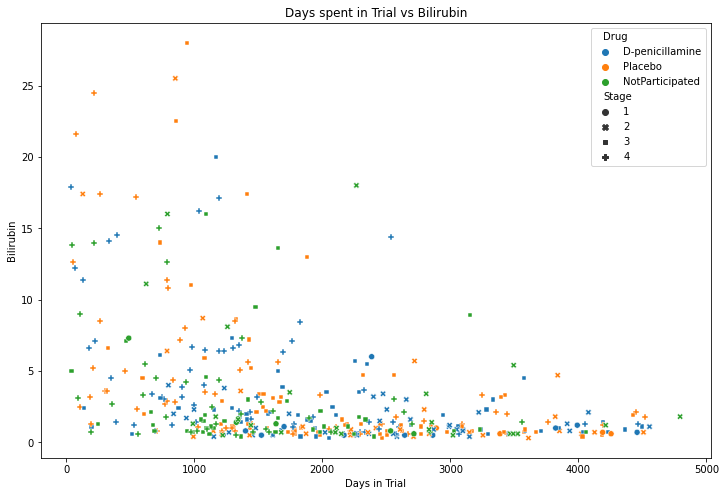

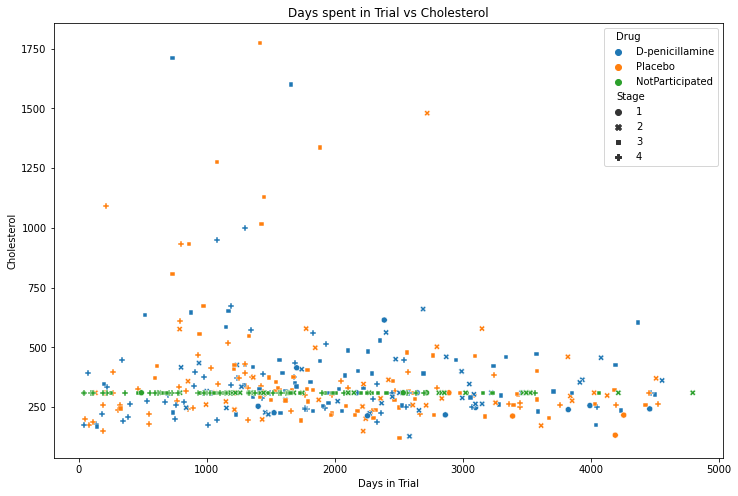

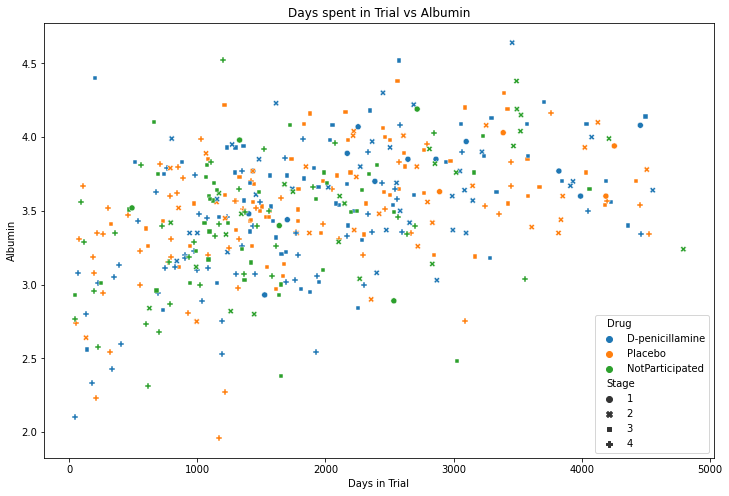

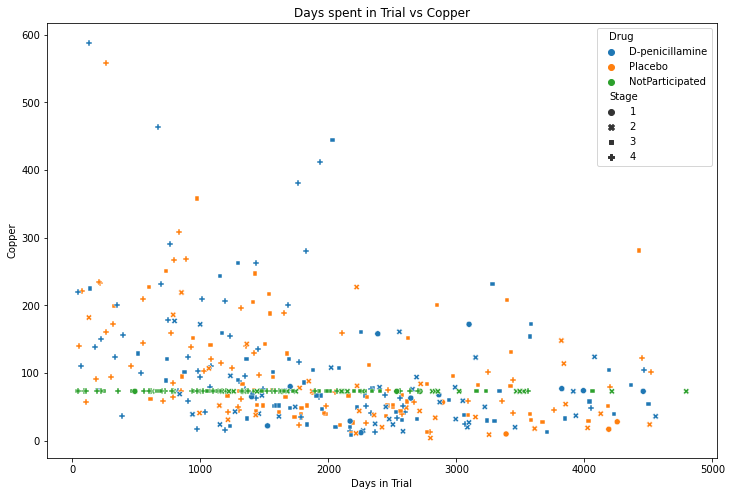

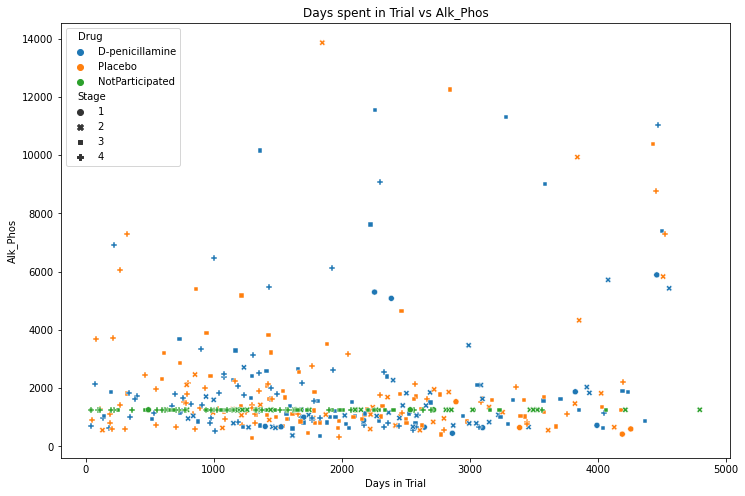

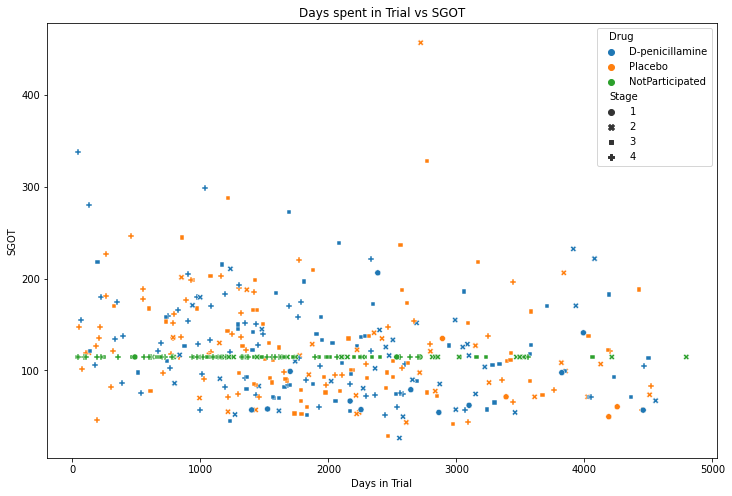

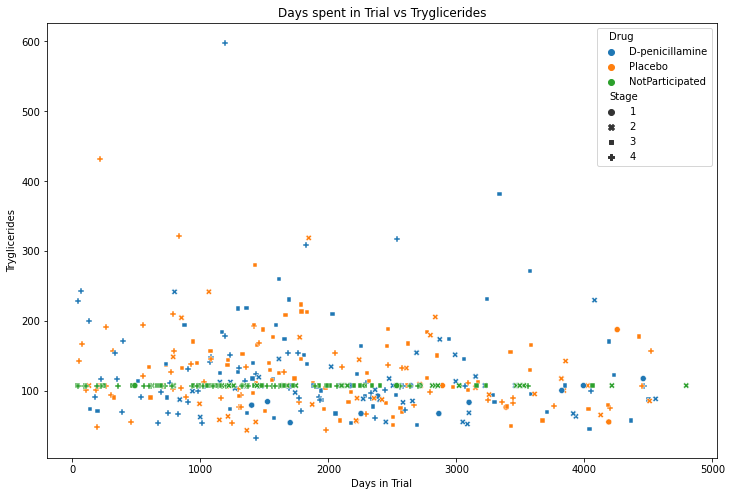

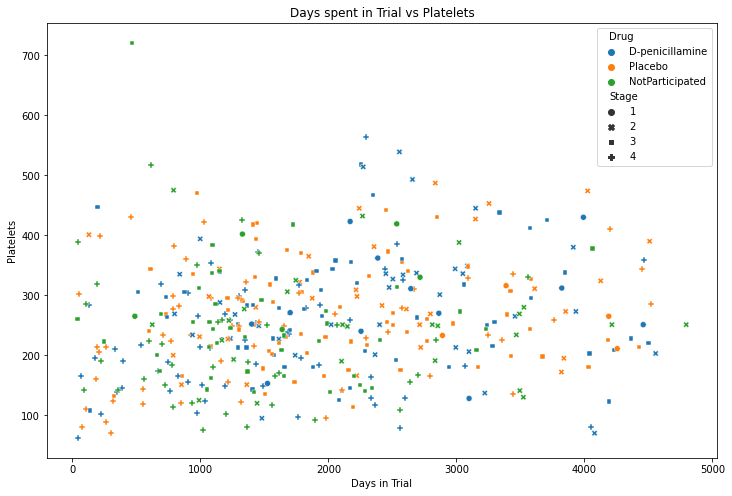

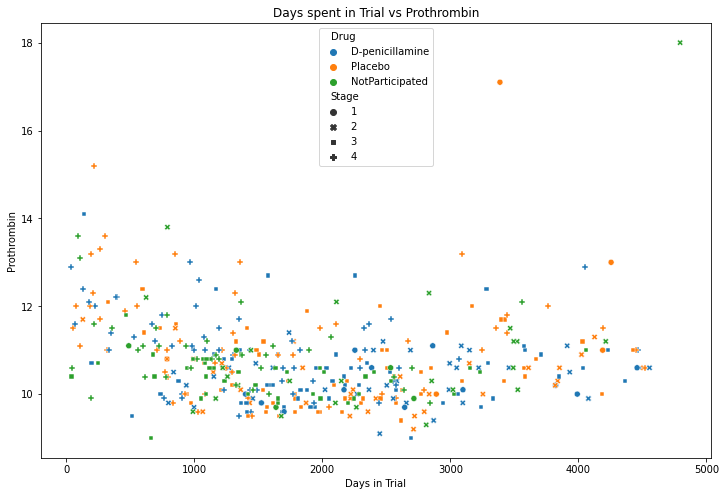

In [ ]:
measurements = [
  'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
  'Tryglicerides', 'Platelets', 'Prothrombin'
  ]

figure_size = (12,8)
for m in measurements:
  plt.figure(figsize=figure_size)
  plt.title(f'Days spent in Trial vs {m}')
  age_and_days = seaborn.scatterplot(x=temp_df['N_Days'], y=temp_df[m], style=temp_df['Stage'], hue=temp_df['Drug'])
  age_and_days.set(xlabel='Days in Trial', ylabel=m)
  plt.show()

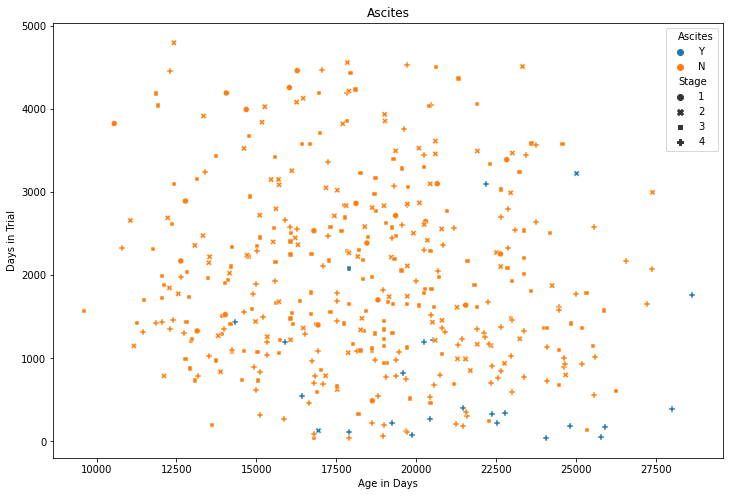

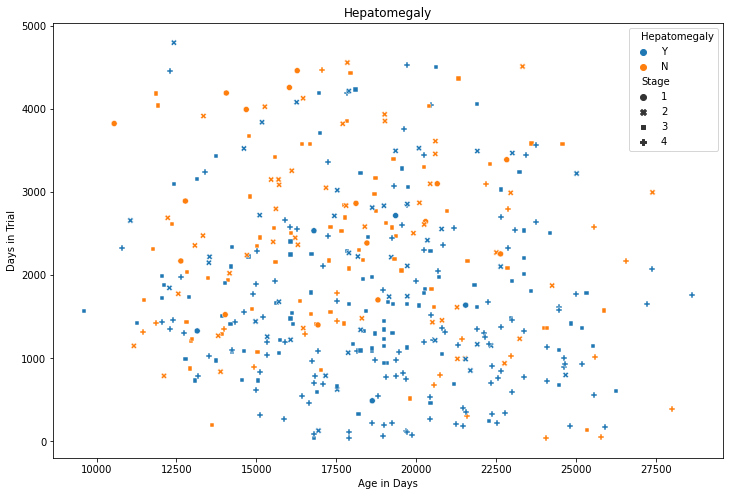

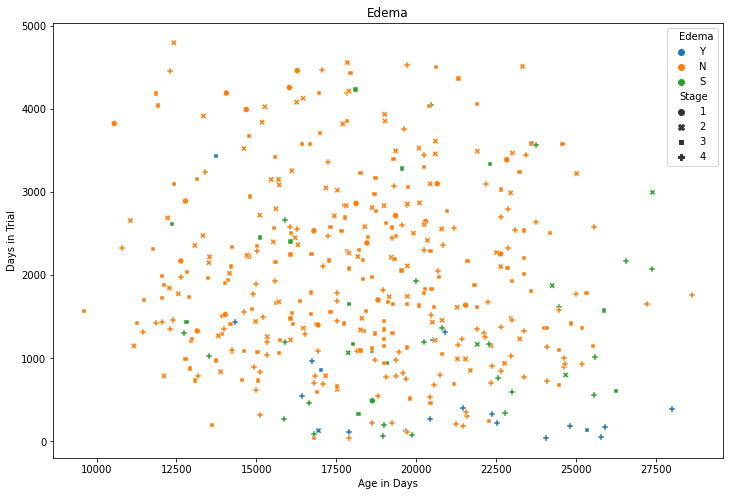

In [ ]:
conditions = ['Ascites', 'Hepatomegaly', 'Edema']

figure_size = (12,8)
for c in conditions:
  plt.figure(figsize=figure_size)
  plt.title(f'{c}')
  age_and_days = seaborn.scatterplot(x=temp_df['Age'], y=temp_df['N_Days'], style=temp_df['Stage'], hue=temp_df[c])
  age_and_days.set(xlabel='Age in Days', ylabel='Days in Trial')
  plt.show()

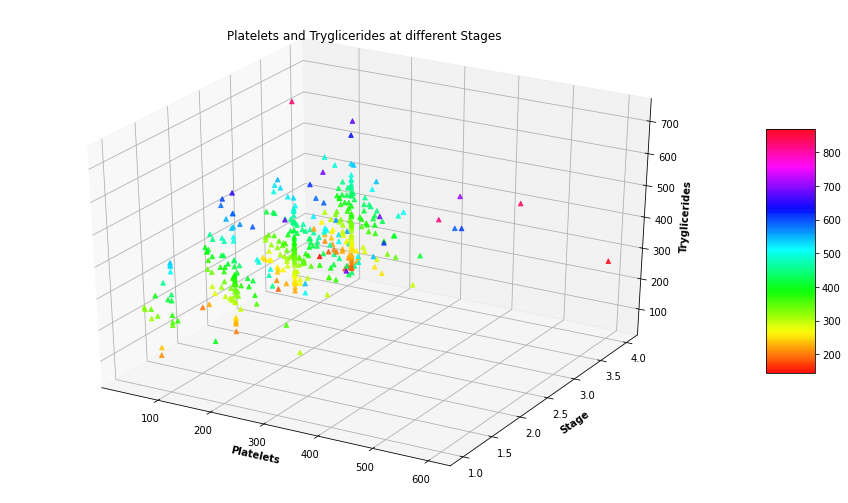

In [ ]:
z = temp_df['Platelets']
x = temp_df['Tryglicerides']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Platelets and Tryglicerides at different Stages")
ax.set_xlabel('Platelets', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('Tryglicerides', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

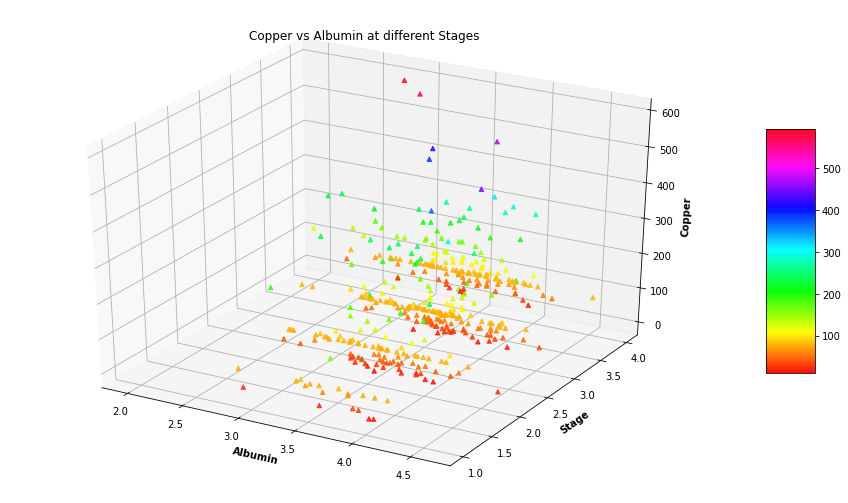

In [ ]:
z = temp_df['Copper']
x = temp_df['Albumin']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Copper vs Albumin at different Stages")
ax.set_xlabel('Albumin', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('Copper', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

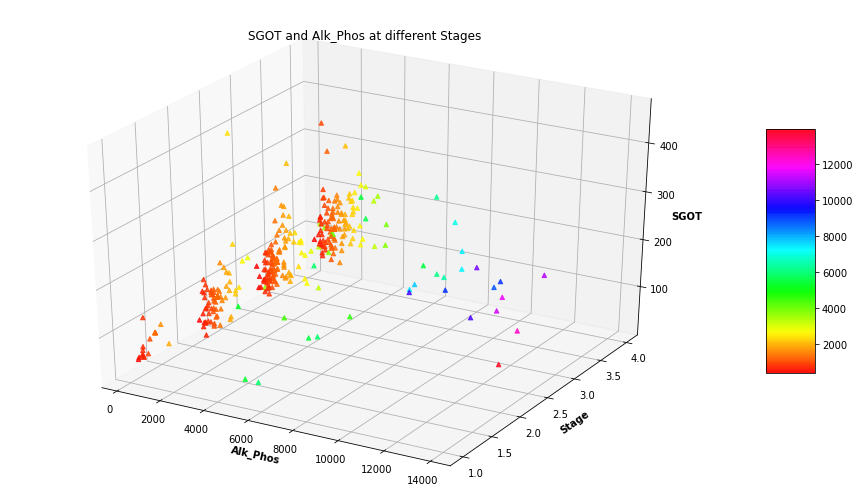

In [ ]:
z = temp_df['SGOT']
x = temp_df['Alk_Phos']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("SGOT and Alk_Phos at different Stages")
ax.set_xlabel('Alk_Phos', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('SGOT', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

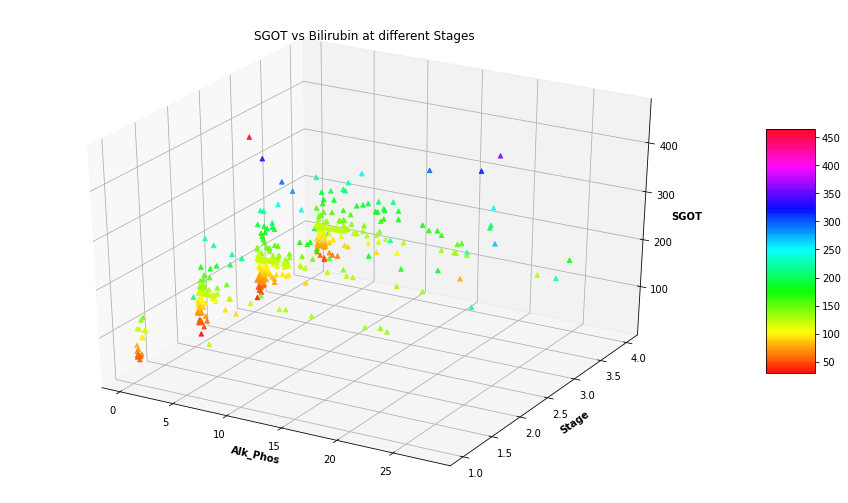

In [ ]:
z = temp_df['SGOT']
x = temp_df['Bilirubin']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("SGOT vs Bilirubin at different Stages")
ax.set_xlabel('Alk_Phos', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('SGOT', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

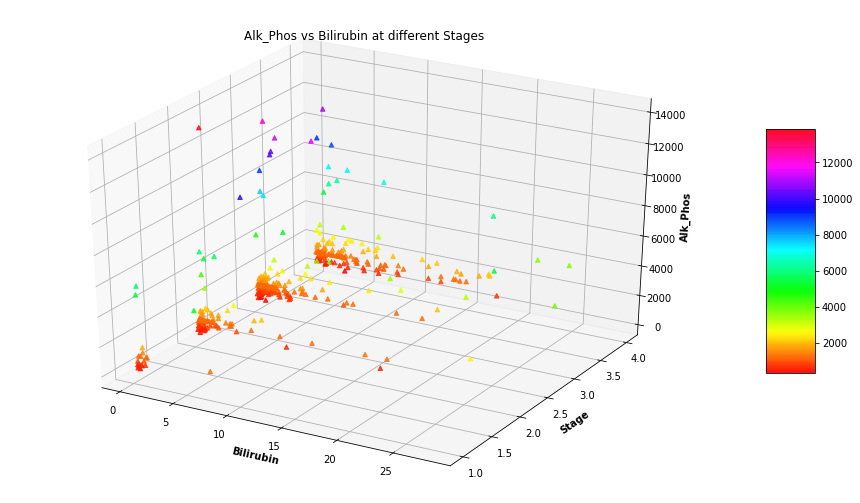

In [ ]:
z = temp_df['Alk_Phos']
x = temp_df['Bilirubin']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Alk_Phos vs Bilirubin at different Stages")
ax.set_xlabel('Bilirubin', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('Alk_Phos', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

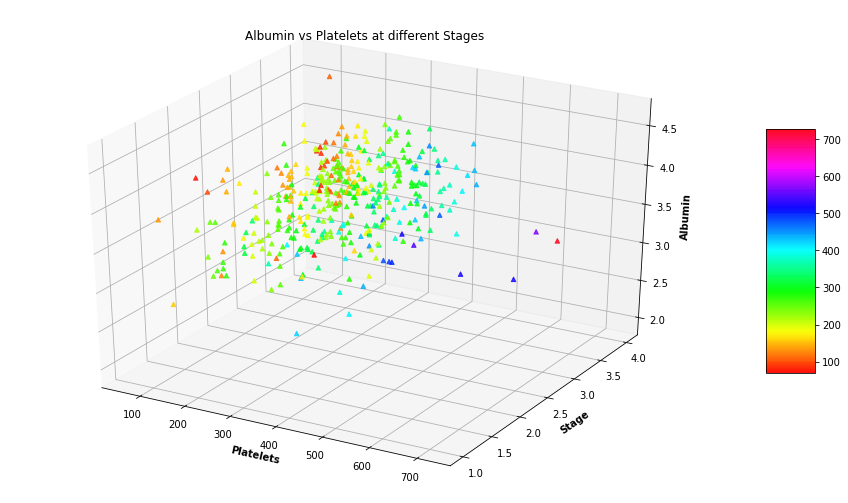

In [ ]:
z = temp_df['Albumin']
x = temp_df['Platelets']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Albumin vs Platelets at different Stages")
ax.set_xlabel('Platelets', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('Albumin', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

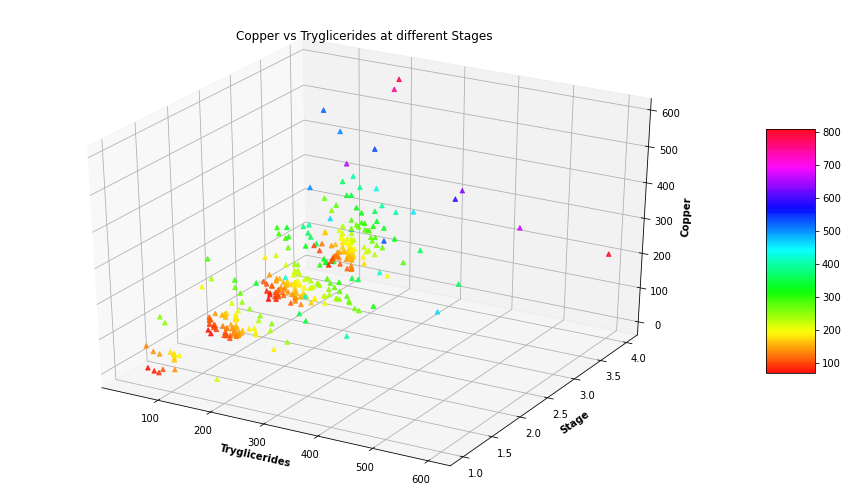

In [ ]:
z = temp_df['Copper']
x = temp_df['Tryglicerides']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Copper vs Tryglicerides at different Stages")
ax.set_xlabel('Tryglicerides', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('Copper', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

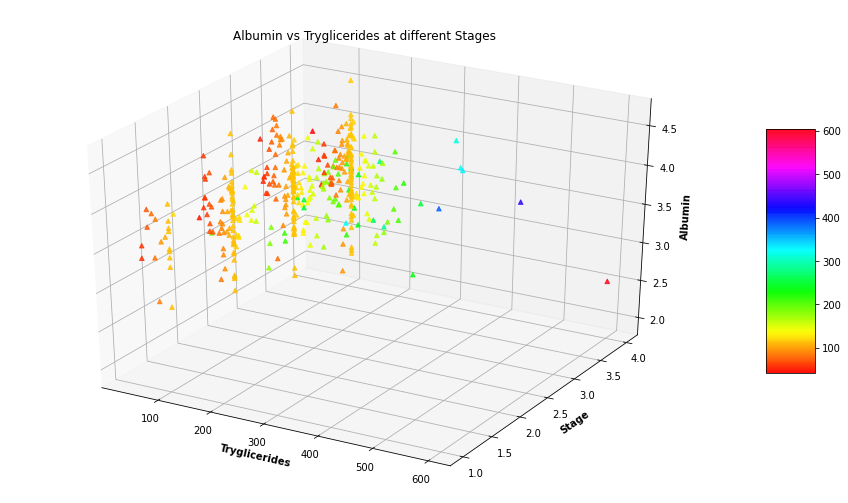

In [ ]:
z = temp_df['Albumin']
x = temp_df['Tryglicerides']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Albumin vs Tryglicerides at different Stages")
ax.set_xlabel('Tryglicerides', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('Albumin', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

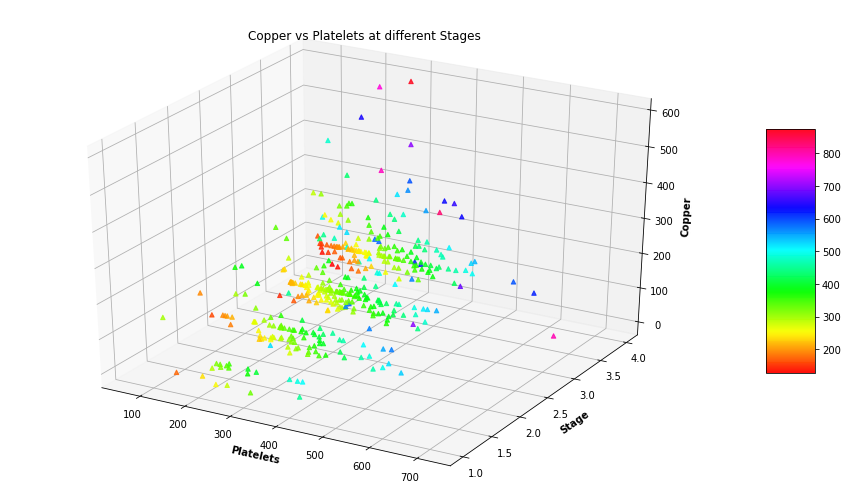

In [ ]:
z = temp_df['Copper']
x = temp_df['Platelets']
y = temp_df['Stage']
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Copper vs Platelets at different Stages")
ax.set_xlabel('Platelets', fontweight ='bold')
ax.set_ylabel('Stage', fontweight ='bold')
ax.set_zlabel('Copper', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

#Set up for machnine learning classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import defaultdict

In [ ]:
def remove_outliers(df, column_list):
    for col in column_list:
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3 - Q1
        
        drop_outliers = [x for x in df[col] if (
        (x > Q1 - 1.5 * IQR) & (x < Q3 + 1.5 * IQR))]
        df = df.loc[df[col].isin(drop_outliers)]
    return df

In [ ]:
X, y = df.drop('Stage', axis=1), df['Stage']
y = y.apply(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(418, 19)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=17)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=17)

In [ ]:
from sklearn.utils.extmath import softmax
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))
y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
y_test = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))
# model = Sequential()
# model.add(Dense(4, input_dim=19, activation="relu"))
# model.add(Dense(3, activation="softmax"))
# #model.add(Dense(1, activation="sigmoid"))
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# model.fit(X_train,y_train, epochs=1000, batch_size=32)
# _, accuracy = model.evaluate(X_train, y_train)
# print("Model accuracy: %.2f"% (accuracy*100))

# model.add(Dense(19, input_dim=19, activation="relu"))
# model.add(Dense(6, activation="softmax"))
# model.add(Dense(6, activation="relu"))
# model.add(Dense(3, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# model.fit(X_train,y_train, epochs=20, batch_size=1)
# _, accuracy = model.evaluate(X_train, y_train)
# print("Model accuracy: %.2f"% (accuracy*100))

# model = Sequential()
# model.add(Dense(12, input_dim=19, activation="relu"))
# model.add(Dense(12, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# model.fit(X_train,y_train, epochs=20, batch_size=3)
# _, accuracy = model.evaluate(X_train, y_train)
# print("Model accuracy: %.2f"% (accuracy*100))
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
model = Sequential()
model.add(Dense(4, input_dim=19, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train, epochs=20, batch_size=3)
_, accuracy = model.evaluate(X_train, y_train)
ann_viz(model, title=" neural network")
print("Model accuracy: %.2f"% (accuracy*100))



Epoch 1/20
112/112 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 2/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 3/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 4/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 5/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 6/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 7/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 8/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 9/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0539
Epoch 10/20
112/112 [==============================] - 0s 2ms/st

Epoch 1/50
34/34 [==============================] - 1s 3ms/step - loss: 2.4482 - accuracy: 0.0240
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 1.7914 - accuracy: 0.0539
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 1.3758 - accuracy: 0.0539
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 1.1405 - accuracy: 0.0539
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 1.0049 - accuracy: 0.0539
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.9183 - accuracy: 0.0539
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.0539
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 0.8177 - accuracy: 0.0539
Epoch 9/50
34/34 [==============================] - 0s 6ms/step - loss: 0.7866 - accuracy: 0.0539
Epoch 10/50
34/34 [==============================] - 0s 6ms/step - loss: 0.7640 - accuracy: 0.0539
Epoch 11/50
34/34 [

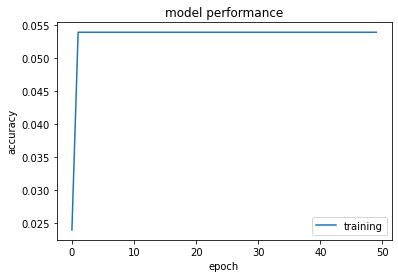

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 0.6493 - accuracy: 0.0539
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.0539
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.0539
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.0539
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.0539
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.0539
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.0539
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.0539
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.0539
Epoch 10/50
34/34 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.0539
Epoch 11/50
34/34 [

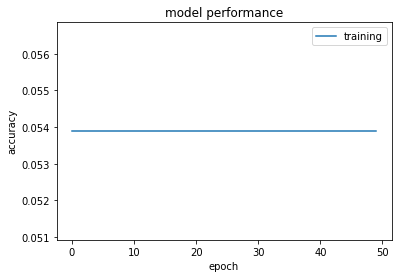

Epoch 1/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.0539 
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.0539
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.0539
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.0539
Epoch 5/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.0539
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.0539
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.0539
Epoch 8/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.0539
Epoch 9/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.0539
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.0539
Epoch 11/50
34/34 

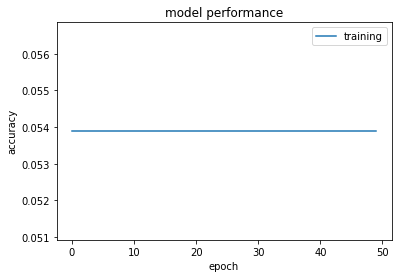

Epoch 1/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.0539
Epoch 2/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.0539
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.0539
Epoch 4/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.0539
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.0539
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.0539
Epoch 7/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6385 - accuracy: 0.0539
Epoch 8/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.0539
Epoch 9/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.0539
Epoch 10/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.0539
Epoch 11/50
34/34 [

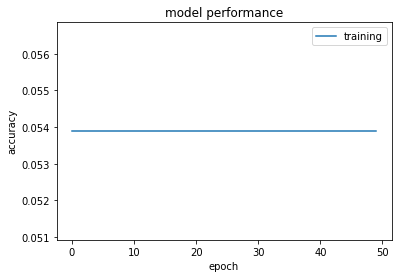

Epoch 1/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.0539
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.0539
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.0539
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.0539
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.0539
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.0539
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.0539
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.0539
Epoch 9/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.0539
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.0539
Epoch 11/50
34/34 [

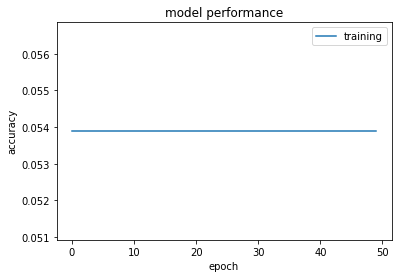

Epoch 1/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.0539
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.0539
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.0539
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.0539
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.0539
Epoch 6/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.0539
Epoch 7/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.0539
Epoch 8/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.0539
Epoch 9/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.0539
Epoch 10/50
34/34 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.0539
Epoch 11/50
34/34 [

KeyboardInterrupt: ignored

In [ ]:
# using lab approach 
import random

X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))
y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
y_test = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))

num_classes = np.unique(y_train)
def create_model(num_layers, num_units, flattened_size, activation_function, class_size):
  '''
  '''

  model = Sequential()
  model.add(Dense(units=num_units, activation=activation_function, input_shape=(flattened_size,)))
  for i in range(num_layers-1):
    model.add(Dense(units=num_units, activation=activation_function))
  model.add(Dense(19, activation='softmax'))

  return model


def evaluate_task3(FCmodel, Learning_Rate, batch_sz, epochs,opti , add_visualization=True):
  '''
  
  '''
  
  opt = opti
  FCmodel.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = FCmodel.fit(X_train, y_train, batch_size=batch_sz, epochs=epochs, 
                        verbose=add_visualization)
  
  loss, accuracy  = FCmodel.evaluate(X_train, y_train, verbose=False)
  
  if add_visualization:
    print(f'validation loss: {loss:.4}')
    print(f'validation accuracy: {accuracy:.4}')

    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model performance')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
    ann_viz(FCmodel, title=" neural network")

  return loss, accuracy


from keras.layers import Dropout
special_model = create_model(num_layers=4, num_units=16, flattened_size=X_test.shape[1], 
                     activation_function='sigmoid', class_size=num_classes)
# loss, acc = evaluate(FCmodel=special_model, Learning_Rate=0.1, batch_sz=256, epochs=100)
# special_model.summary()
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
def advanced_hyperparameter_search(OPTIMIZER, DROPOUT_RATE, KERNEL_INITIALIZER)->pd.DataFrame:
  '''
  
  '''
  

  
  ACC = []
  for O in OPTIMIZER:
    for D in DROPOUT_RATE:
      for K in KERNEL_INITIALIZER:
        model = create_model(num_layers=4, num_units=64, flattened_size=X_test.shape[1], 
                            activation_function='sigmoid', class_size=num_classes)
        model.add(Dense(units=64, activation='sigmoid', input_shape=(X_test.shape[1],), kernel_initializer=K))
        model.add(Dropout(D))
        loss, acc = evaluate_task3(FCmodel=special_model, Learning_Rate=0.001, batch_sz=10, epochs=50, opti =O, add_visualization=True)
        Acc ={'OPTIMIZER': O, 'DROPOUT_RATE': D, 'KERNEL_INITIALIZER':K, 'Accuracy':acc}
        ACC.append(Acc)
            


  #df.sort_values(by=["Accuracy"], ignore_index=True)
  df = pd.DataFrame(data=ACC)
  df=df.sort_values(by = ['Accuracy'], ascending= False,  ignore_index=True)
  return(df)
  

Optimizer = ['SGD', 'ADAM', 'RMSprop', 'Adagrad']
Dropout_Rate = [0, 0.2, 0.5] 
Kernel_Initializer = ['RandomUniform', 'GlorotNormal', 'RandomNormal', 'zero'] 
df = advanced_hyperparameter_search(Optimizer, Dropout_Rate, Kernel_Initializer)
df.head(10)



In [ ]:
# now test with a keras tuner 
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt

img_train = (X_train, y_train)
label_train = ("x_train", "y_train")


def build_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()
    
    model.add(Conv2D(hp.Int('input_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3), input_shape=X_train.shape[1:]))
    
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
        model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3)))
        model.add(Activation('relu'))

    model.add(Flatten()) 
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=["accuracy"])
    
    return model



def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(19, 19,1)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

tuner = kt.Hyperband(model_builder,
                    objective='val_accuracy',
                    max_epochs=10,
                    factor=3,
                    directory='my_dir',
                    project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(img_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import TensorBoard

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
import pickle

print(X_train.shape)
print(y_train.shape)
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)
print(X_train.shape)
print(y_train.shape)
#X_train = X_train.reshape(-1, 19, 19, 1)  # reshaping for convnet
#X_test = X_test.reshape(-1, 7, 12, 9)  # reshaping for convnet
def build_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()

    model.add(Conv2D(hp.Int('input_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3), input_shape=X_train.shape[1:]))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
        model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3)))
        model.add(Activation('relu'))

    model.add(Flatten()) 
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=["accuracy"])

    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # how many variations on model?
    executions_per_trial=2,  # how many trials per variation? (same model could perform differently)
    directory = 'log_dr')

tuner.search_space_summary()
print(X_train.size)
print(y_train.size)
tuner.search(x=X_train,
             y=y_train,
             epochs=3,
             batch_size=64,
             #callbacks=[TensorBoard],
             validation_data=(X_test, y_test))

tuner.results_summary()


with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)


# Neural Network 

#Machine learning Classifier Models

In [ ]:
# Helper function 1: 
# Create a data frame to colect the test and train moddel accuracy  
def add_performance_to_df(df_name, name_model, model, train_X, train_y, test_X, test_y):
    adder = {'model' : '', 'train_roc_auc_score_ovo': '', 'train_roc_auc_score_ovr': '',
             'test_roc_auc_score_ovo': '', 'test_roc_auc_score_ovr': ''}
    
    train_proba_predictions = model.predict_proba(train_X)
    test_proba_predictions = model.predict_proba(test_X)
    
    adder['model'] = name_model
    adder['train_roc_auc_score_ovo'] = roc_auc_score(y_true=train_y, y_score = train_proba_predictions, average='macro', multi_class='ovo')
    adder['train_roc_auc_score_ovr'] = roc_auc_score(y_true=train_y, y_score = train_proba_predictions, average='macro', multi_class='ovr')
    adder['test_roc_auc_score_ovo'] = roc_auc_score(y_true=test_y, y_score = test_proba_predictions, average='macro', multi_class='ovo')
    adder['test_roc_auc_score_ovr'] = roc_auc_score(y_true=test_y, y_score = test_proba_predictions, average='macro', multi_class='ovr')
    
    
    return df_name.append(adder, ignore_index=True)

In [ ]:
# Create a check for the accuracy  to colect the test and train moddel
def get_models_performance(models, X_train, y_train, X_test, y_test):
    cols = ['model', 'train_roc_auc_score_ovo', 'train_roc_auc_score_ovr', 
            'test_roc_auc_score_ovo', 'test_roc_auc_score_ovr']
    
    model_performance = pd.DataFrame(columns=cols)

    for key in models:
        model_performance = add_performance_to_df(model_performance, key, models[key],
                                                  X_train, y_train, X_test, y_test)
    return model_performance

In [ ]:
# Prepare the dataset (remove Stage )and outliner log and IQR to check the other attributes
def data_prep(outliers_treatment=None, drop_id=False, floating_cat_features_encoding=False):
    data = pd.read_csv('/content/drive/MyDrive/cirrhosis.csv')
    data['Drug'] = data['Drug'].fillna('NotParticipated')
    data, decoder = encode_with_nan(data)
    data = knn_imputer2df(data)
    
    if not floating_cat_features_encoding:
        data = round_encoded_cat_features(data, decoder)
    
    if outliers_treatment == 'log':
        columns = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
        for col in columns:
            data[col] = data[col].apply(lambda x: np.log(x + 1))
    
    if outliers_treatment == 'IQR':
        columns = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
        data = remove_outliers(data, columns)
        
    
    if drop_id:
        data = data.drop('ID', axis=1)
        
    X, y = data.drop('Stage', axis=1), data['Stage']
    y = y.apply(int)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

In [ ]:
def pipeline(outliers_treatment=None, drop_id=False, floating_cat_features_encoding=False):
    X_scaled, y = data_prep(outliers_treatment=outliers_treatment, drop_id=drop_id, floating_cat_features_encoding=floating_cat_features_encoding)
    print('X shape: ', X_scaled.shape, ' y shape: ', y.shape)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=17)
    
    # lr
    lr = LogisticRegression(random_state=17)
    lr.fit(X_train, y_train)
    # ----------------------------------

    # lr_gcv
    lr_params = {'solver': ['sag', 'saga', 'liblinear'],
                 'C': np.logspace(-3, 1, 5),
                 'penalty': ['l1', 'l2', 'elasticnet'],
                 'class_weight': ['balanced', None]
                }

    lr_gcv = GridSearchCV(estimator=LogisticRegression(random_state=17), param_grid=lr_params, scoring='roc_auc_ovo', cv=5, verbose=True, n_jobs=-1)
    lr_gcv.fit(X_train, y_train)
    best_lr = lr_gcv.best_estimator_
    # -----------------------------
    
    # knn
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    # --------------------------
    
    # knn_gcv
    knn_params = {'n_neighbors': range(2, 8),
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree'], 
              'p': range(1, 5)}

    knn_gcv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params,  scoring='roc_auc_ovo', cv=5, verbose=True, n_jobs=-1)
    knn_gcv.fit(X_train, y_train)
    best_knn = knn_gcv.best_estimator_
    # --------------------
    
    # svm
    svm = SVC(probability=True, random_state=17)
    svm.fit(X_train, y_train)
    # --------------------
    
    # svm_gcv
    svm_params = {'C': np.logspace(-4, 1, 6),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'class_weight': ['balanced', None]}

    svm_gcv = GridSearchCV(estimator=SVC(random_state=17, probability=True), param_grid=svm_params, scoring='roc_auc_ovo', cv=5, verbose=True, n_jobs=-1)
    svm_gcv.fit(X_train, y_train)
    best_svm = svm_gcv.best_estimator_
    # -----------------------

    # rf
    rf = RandomForestClassifier(random_state=17)
    rf.fit(X_train, y_train)
    # ------------------------------------

    # rf_gcv
    rf_params = {'n_estimators': range(20, 120, 20),
                 'criterion': ['gini', 'entropy'],
                 'min_samples_split': range(2, 8, 2),
                 'min_samples_leaf': range(1, 5),
                 'class_weight': ['balanced', 'balanced_subsample', None]}


    rf_gcv = GridSearchCV(estimator=RandomForestClassifier(random_state=17), param_grid=rf_params, scoring='roc_auc_ovo', cv=5, verbose=True, n_jobs=-1)
    rf_gcv.fit(X_train, y_train)
    best_rf = rf_gcv.best_estimator_
    # ----------------------------

    # gb
    gb = GradientBoostingClassifier(random_state=17)
    gb.fit(X_train, y_train)
    # ----------------------------

    # gb_gcv
    gb_params = {'loss': ['deviance', 'exponential'],
                 'learning_rate': np.logspace(-4, 1, 4),
                 'n_estimators': range(60, 160, 20),
                 'min_samples_split': range(2, 8, 2),
                 'min_samples_leaf': range(1, 5),
                 'max_features': ['sqrt', 'log2']}


    gb_gcv = GridSearchCV(estimator=GradientBoostingClassifier(random_state=17), param_grid=gb_params, scoring='roc_auc_ovo', cv=5, verbose=True, n_jobs=-1)
    gb_gcv.fit(X_train, y_train)
    best_gb = gb_gcv.best_estimator_

    
    lr = {'LogReg': lr}
    best_lr = {'LogReg_CV': best_lr}
    knn = {'KNN': knn}
    best_knn = {'KNN-CV': best_knn}
    svm = {'SVM': svm}
    best_svm = {'SVM-CV': best_svm}
    rf = {'RandomForest': rf}
    best_rf = {'RandomForest_CV': best_rf}
    gb = {'GradBoost': gb}
    best_gb =  {'GradBoost_CV': best_gb}
    
    models = {**lr, **best_lr, **knn, **best_knn, **svm, **best_svm, **rf, **best_rf, **gb, **best_gb}
    
    print('making perform...')
    model_performance = get_models_performance(models=models, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
    print('Perform ready')
    return model_performance, models

In [ ]:
outliers = ['log', 'IQR', None]
drop_id = [False, True]
fcfe = [False, True]
combinations = list(product(outliers, drop_id, fcfe))
combinations

#Classifing 

In [ ]:
perf_n_models = []
for combo in tqdm(combinations):
    print(combo)
    perf_n_models.append(pipeline(*combo))

In [ ]:
perf_n_models[0][0]

In [ ]:
perf_n_models[0][0].describe()

In [ ]:
#  ('log', False, True),
perf_n_models[1][0]

In [ ]:
perf_n_models[1][0].describe()

In [ ]:
# ('log', True, False),
perf_n_models[2][0]

In [ ]:
perf_n_models[2][0].describe()

In [ ]:
# ('log', True, True),
perf_n_models[3][0]

In [ ]:
perf_n_models[3][0].describe()

In [ ]:
#('IQR', False, False),
perf_n_models[4][0]

In [ ]:
perf_n_models[4][0].describe()

In [ ]:
#('IQR', False, True),
perf_n_models[5][0]

In [ ]:
perf_n_models[5][0].describe()

In [ ]:
#('IQR', True, False),
perf_n_models[6][0]

In [ ]:
perf_n_models[6][0].describe()

In [ ]:
#('IQR', True, True),
perf_n_models[7][0]

In [ ]:
perf_n_models[7][0].describe()

In [ ]:
#(None, False, False),
perf_n_models[8][0]

In [ ]:
perf_n_models[8][0].describe()

In [ ]:
#(None, False, True),
perf_n_models[9][0]

In [ ]:
perf_n_models[9][0].describe()

In [ ]:
#(None, True, False),
perf_n_models[10][0]

In [ ]:
perf_n_models[10][0].describe()

In [ ]:
#(None, True, True)]
perf_n_models[11][0]

In [ ]:
perf_n_models[11][0].describe()

In [ ]:
def df_for_blend(models, models_name, tr_X, te_X, tr_y, te_y):
    tr_blend_df = pd.DataFrame(columns=models_name) 
    te_blend_df = pd.DataFrame(columns=models_name)
    for model, name in zip(models, models_name):
        model.fit(tr_X, tr_y)
        train_pred = model.predict(tr_X)
        test_pred = model.predict(te_X)
        tr_blend_df[name] = train_pred
        te_blend_df[name] = test_pred
    return tr_blend_df, te_blend_df


def blend_clf(tr_blend_df, te_blend_df, tr_y, te_y):
    lr = LogisticRegression(solver='liblinear', random_state=17)
    lr.fit(tr_blend_df, tr_y)
    return lr

In [ ]:
first_approach = perf_n_models[1][0].copy() # ('log', False, True)
first_approach

In [ ]:
X1_scaled, y1 = data_prep('log', False, True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.33, random_state=17)

In [ ]:
models = [perf_n_models[1][1]['LogReg_CV'], perf_n_models[1][1]['KNN-CV'],
          perf_n_models[1][1]['SVM'], perf_n_models[1][1]['RandomForest'], perf_n_models[1][1]['GradBoost_CV']]

model_names = ['LogReg_CV', 'KNN-CV', 'SVM', 'RandomForest', 'GradBoost_CV']

tr_blend_df, te_blend_df = df_for_blend(models=models, models_name=model_names,
                                        tr_X=X1_train, te_X=X1_test, tr_y=y1_train, te_y=y1_test)

tr_blend_df

In [ ]:
plt.figure(figsize=(12, 12))
seaborn.heatmap(tr_blend_df.corr());

In [ ]:
tr_blend_df, te_blend_df = tr_blend_df.drop('GradBoost_CV', axis=1), te_blend_df.drop('GradBoost_CV', axis=1)

In [ ]:
blend = blend_clf(tr_blend_df, te_blend_df, y1_train, y1_test)
first_approach = add_performance_to_df(perf_n_models[1][0], 'BlendingClassifier', blend, tr_blend_df, y1_train, te_blend_df, y1_test)
first_approach

In [ ]:
second_approach = perf_n_models[11][0] #(None, True, True)]
second_approach

In [ ]:
X2_scaled, y2 = data_prep(None, True, True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.33, random_state=17)

In [ ]:
models = [perf_n_models[11][1]['LogReg'], perf_n_models[11][1]['KNN-CV'],
          perf_n_models[11][1]['SVM'], perf_n_models[11][1]['RandomForest_CV'], perf_n_models[11][1]['GradBoost_CV']]

model_names = ['LogReg', 'KNN-CV', 'SVM', 'RandomForest_CV', 'GradBoost_CV']

tr_blend_df, te_blend_df = df_for_blend(models=models, models_name=model_names,
                                        tr_X=X2_train, te_X=X2_test, tr_y=y2_train, te_y=y2_test)

tr_blend_df

In [ ]:
plt.figure(figsize=(12, 8))
seaborn.heatmap(tr_blend_df.corr());

In [ ]:
tr_blend_df, te_blend_df = tr_blend_df.drop('GradBoost_CV', axis=1), te_blend_df.drop('GradBoost_CV', axis=1)

In [ ]:
blend = blend_clf(tr_blend_df, te_blend_df, y2_train, y2_test)
second_approach = add_performance_to_df(second_approach, 'BlendingClassifier', blend, tr_blend_df, y2_train, te_blend_df, y2_test)
second_approach

In [ ]:
def stacking_clf(models, model_names, tr_X, tr_y):
    level0 = list()
    for model, name in zip(models, model_names):
        level0.append((name, model))
        
    level1 = LogisticRegression(C=0.001, class_weight='balanced', random_state=17, solver='liblinear')
    stcl = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, stack_method='predict_proba', passthrough=True, n_jobs=-1)
    stcl.fit(tr_X, tr_y)
    return stcl

In [ ]:
model_names, models = list(perf_n_models[1][1].keys()), list(perf_n_models[1][1].values()),
stacking = stacking_clf(models, model_names, X1_train, y1_train)
first_approach = add_performance_to_df(first_approach, 'StackingClassifier', stacking, X1_train, y1_train, X1_test, y1_test)
first_approach

In [ ]:
model_names, models = list(perf_n_models[11][1].keys()), list(perf_n_models[11][1].values()),
stacking = stacking_clf(models, model_names, X2_train, y2_train)
second_approach = add_performance_to_df(second_approach, 'StackingClassifier', stacking, X2_train, y2_train, X2_test, y2_test)
second_approach

In [ ]:
bagg = BaggingClassifier(base_estimator=perf_n_models[1][1]['GradBoost_CV'], random_state=17, bootstrap=True)
bagg.fit(X1_train, y1_train)
first_approach = add_performance_to_df(first_approach, 'BaggingClassifier(GradBoost)', bagg, X1_train, y1_train, X1_test, y1_test)
first_approach

In [ ]:
bagg = BaggingClassifier(base_estimator=perf_n_models[11][1]['RandomForest_CV'], random_state=17, bootstrap=True)
bagg.fit(X2_train, y2_train)
second_approach = add_performance_to_df(second_approach, 'BaggingClassifier(RandomForest_CV)', bagg, X2_train, y2_train, X2_test, y2_test)
second_approach

#Important feature 

In [ ]:
best_first_ap_model = perf_n_models[1][1]['GradBoost_CV']
the_best_second_ap_model = perf_n_models[11][1]['RandomForest_CV']

In [ ]:
plt.figure(figsize=(12, 8))
rf_indices = np.argsort(the_best_second_ap_model.feature_importances_)[::-1]
ax2 = seaborn.barplot(y=df.drop('ID', axis=1).columns[rf_indices], x = best_first_ap_model.feature_importances_[rf_indices] , orient='h')
ax2.set_xlabel('Importance', fontsize=12)
ax2.set_ylabel('Features', fontsize=12)
ax2.set_title('Second approach RandomForest with Cross validation(The best!)');

In [ ]:
plt.figure(figsize=(12, 8))
gb_indices = np.argsort(best_first_ap_model.feature_importances_)[::-1]
ax1 = seaborn.barplot(y=df.drop('ID', axis=1).columns[gb_indices], x = best_first_ap_model.feature_importances_[gb_indices] , orient='h')
ax1.set_xlabel('Importance', fontsize=12)
ax1.set_ylabel('Features', fontsize=12)
ax1.set_title('First approach GradBoost with Cross validation (Not the best)')

# Decision tree

In [ ]:
# predicts the stage of cirrhosis that the patient is in 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# using temp_df that has mising values removed 
# split the data into traning and testing sets 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=17)
#X_train
# Create Decision Tree classifer object using different hyper parameters
# hyper paramater testing
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
class_weight_options = [None, "balanced"]
criterion_options = ["gini",  "entropy"]
max_depth_options = [1,2,3,4,5,6,7,8,9,10,11,12]
max_features_options = [None,"auto", "sqrt" , "log2"]
min_samples_leaf_options = [1,2,3,4,5,7,8,9,10]
min_samples_split_options = [2,3,4,5,6,7,8,9,10]
min_weight_fraction_leaf_options = [0.1,0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5]
splitter_options = ["best", "random"]
ACC = []
for CW in class_weight_options:
  for C in criterion_options:
    for MD in max_depth_options:
      for MF in max_features_options:
        for MSL in min_samples_leaf_options:
          for MSS in min_samples_split_options:
            for S in splitter_options:
              for MWFL in min_weight_fraction_leaf_options:
                clf = DecisionTreeClassifier(class_weight=CW, criterion=C, max_depth=MD,
                max_features=MF, max_leaf_nodes=None,
                min_samples_leaf= MSL,
                min_samples_split= MSS, min_weight_fraction_leaf= MWFL, random_state= None, splitter= S)
              # clf = DecisionTreeClassifier()
                # Train Decision Tree Classifer
                clf = clf.fit(X_train,y_train)

                #Predict the response for test dataset
                y_pred = clf.predict(X_test)

                # Model Accuracy, how often is the classifier correct?
                #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
                
                Acc ={'class_weight': CW, 'criterion': C, 'max_depth': MD,
                'max_features':MF, 'max_leaf_nodes':None,
                'min_impurity_split':1e-07, 'min_samples_leaf':MSL,
                'min_samples_split':MSS, 'min_weight_fraction_leaf':MWFL,
                'random_state':None, 'splitter':S, 'Accuracy':metrics.accuracy_score(y_test, y_pred)}
                ACC.append(Acc)
              
dff = pd.DataFrame(data=ACC)
dff=dff.sort_values(by = ['Accuracy'], ascending= False,  ignore_index=True)
dff.head(10)

In [ ]:
dff.tail(10)

In [ ]:
#Best decision tree 
dff.head(1)

In [ ]:
# using second best hyperparameters
clf = DecisionTreeClassifier(class_weight=None, criterion="entropy", max_depth=9,
                max_features="sqrt", max_leaf_nodes=None,
                 min_samples_leaf=3,
                min_samples_split=2, min_weight_fraction_leaf=0.1,
                random_state=None, splitter="best")
clf = clf.fit(X_train,y_train)

                #Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
feature_cols = ['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols)
                #class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
#using the best paramaters 
clf = DecisionTreeClassifier(class_weight=None, criterion="gini", max_depth=12,
                max_features="log2", max_leaf_nodes=None,
                 min_samples_leaf=4,
                min_samples_split=2, min_weight_fraction_leaf=0.15,
                random_state=None, splitter= "best")
clf = clf.fit(X_train,y_train)

                #Predict the response for test dataset
y_pred = clf.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#from sklearn.externals.six import StringIO  
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
feature_cols = ['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin']
feature_target= ['1','2','3','4']
#dot_data 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=feature_target,
                   filled=True)

#Reference

Kryshtop, A. (2021, September 15). Cirrhosis prediction. Kaggle. Retrieved November 17, 2021, from https://www.kaggle.com/alexkryshtop/cirrhosis-prediction. 